# Food Reviews Analysis, Classification and Model Design

### Overview of this dataset:

### Characteristics:
The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

1. Number of reviews: 568,454
2. Number of users: 256,059
3. Number of products: 74,258
4. Timespan: Oct 1999 - Oct 2012
5. Number of Attributes/Columns in data: 10

### Features:
1. IdRow - Id
2. ProductId - Unique identifier for the product
3. UserId - Unqiue identifier for the user
4. ProfileName - Profile name of the user
5. HelpfulnessNumerator - Number of users who found the review helpful
6. HelpfulnessDenominator - Number of users who indicated whether they found the review helpful or not
7. Score - Rating between 1 and 5
8. Time - Timestamp for the review
9. Summary - Brief summary of the review
10. Text - Text of the review

### Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

## About analysis performed:
We'll analyze data by using dimensionality reduction techinques like PCA, t-SNE and various algorithms like K-NN, Bayes classification using various strategies like BagofWords, Tf-Idf Model, Average Word2Vec Model, Average Tf-Idf Word2Vec Model.

## Analysis

### 1. Importing required libraries

In [ ]:
# sqlite3 library for performing operations on sqlite file
import sqlite3
# numpy for easy numerical computations
import numpy as np
# pandas for dataframes and filterings
import pandas as pd
# matplotlib for plotting graphs
import matplotlib.pyplot as plt
# seaborn library for easy plotting
import seaborn as sbrn
# warnings library for specific settings
import warnings
# tqdm for tracking progress of loops
from tqdm import tqdm_notebook as tqdm
# regularlanguage for regex operations
import re
# For debugging code
import pdb
# For creating BagOfWords Model
from sklearn.feature_extraction.text import CountVectorizer
# For calculating TSNE values
from sklearn.manifold import TSNE
# For standardizing values
from sklearn.preprocessing import StandardScaler
# For creating TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
# For creating Word2Vector model
from gensim.models import Word2Vec
# For splitting dataset and some other functionalities
from sklearn import model_selection
# For bayesian classification
from sklearn.naive_bayes import MultinomialNB
# For getting value of roc_curve
from sklearn.metrics import roc_curve
# For getting auc value
from sklearn.metrics import auc
# For getting fpr, tp, tn, fn values
from sklearn.metrics import confusion_matrix
# For balancing data
from sklearn.utils import resample
# For shuffling data
from sklearn.utils import shuffle
# For loading data in google drive
from google.colab import drive
# For mounting into google drive
drive.mount('/content/drive')
# For creating classifier using K-NN
from sklearn.neighbors import KNeighborsClassifier
# For obtaining the cross validation scores
from sklearn.model_selection import cross_val_score

# filtering warnings for better visualization
warnings.filterwarnings("ignore");
# Connecting database using sqlite3
connection = sqlite3.connect("drive/My Drive/database.sqlite");

In [2]:
# Selecting all rows from database and storing into dataframe
reviewsDataFrame = pd.read_sql_query("Select * from Reviews", connection);
# Printing shape of the dataframe to know how many datapoints and features are present
print(reviewsDataFrame.shape);
# printing top 5 datapoints
reviewsDataFrame.head(5)

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# Taking top 6000 datapoints and storing into new variable which will become dataframe
reviewsData = reviewsDataFrame.head(100000);
# Verifying the dataframe by printing it's shape
print(reviewsData.shape);
# Printing top 5 rows of the dataframe
reviewsData.head(5)

(100000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Replacing every score value with 1 if score > 3 and 0 if score < 3 by using map on score column of reviews dataframe
reviewsData['Score'] = reviewsData['Score'].map(lambda x: 1 if x > 3 else 0);
# Verifying the dataframe by printing it's shape
print(reviewsData.shape);
# Printing top 5 rows of the dataframe
reviewsData.head(5)

(100000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 2. Data Cleaning - Deduplication
### Error Data:
One of the possible errors was getting such data where HelpfulnessNumerator will be greater than HelpfulnessDenominator which should not be and so we can treat such data as some error data. We should remove such data before our analysis

In [5]:
# Filtering such data where HelpfulnessNumerator > HelpfulnessDenominator by using pandas dataframe mask
errorData = reviewsData[reviewsData.HelpfulnessNumerator > reviewsData.HelpfulnessDenominator];
# Printing shape of errorData to know how many such datapoints exist
print(errorData.shape);
# printing errorData
errorData

(2, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


#### Though there were no such data in above sample below code is just to show how to remove if such data exists

In [6]:
"""
Assigning such data where reviewsData.HelpfulnessNumerator <= reviewsData.HelpfulnessDenominator
which indirectly removes all such data where HelpfulnessNumerator > HelpfulnessDenominator by using pandas dataframe mask
"""
reviewsData = reviewsData[reviewsData.HelpfulnessNumerator <= reviewsData.HelpfulnessDenominator];
# Printing shape to know how many such datapoints exist
print(reviewsData.shape);
# Printing top 5 rows of dataframe to verify
reviewsData.head(5)

(99998, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Product Variations Useless Data:
In below sample you can see that two of the reviews rows have all same values except ProductId. Even Time is same and how can user give two reviews at same time? Actually user has given review to one variation of product which will be reflected even to it's variations and so we need to remove them
#### One such sample:

In [7]:
# Showing one sample of data for explaining the product variations problem by pandas dataframe mask
reviewsData[reviewsData['UserId'] == 'A3HDKO7OW0QNK4']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,1,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,1,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...


#### All such data: 

In [8]:
# Removing all product variations problems data with pandas dataframe mask
productVariationsProblemsData = reviewsData[reviewsData[['UserId', 'ProfileName', 'Time', 'Summary', 'Text']].duplicated() == True];
# Printing shape to know how many such datapoints exist
print(productVariationsProblemsData.shape)
# Printing top 5 rows of dataframe to show the data
productVariationsProblemsData.head(5)

(11415, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,1,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,1,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,0,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,0,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,0,1127606400,Below standard,Too much of the white pith on this orange peel...


### Removing such data:
Before removing such data we should check whether nan values are present because we should not want to remove all such data, we should keep one of it. We should not keep that row which is containing nan values in some of it's columns. So to avoid this we will sort data by ProductId in such a way that pushing all nan value rows to last and keeping first of this data.

In [9]:
# Filtering such data where any of the column value is null
dataWithNanValues = reviewsData[reviewsData.isnull().any(axis = 1)]
# Printing shape to know how many such datapoints exist
print(dataWithNanValues.shape);
# Printing all such data
dataWithNanValues

(0, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [10]:
# Sorting data by ProductId
sortedReviewsData = reviewsData.sort_values(by = ['ProductId'], inplace = False, kind = "quicksort", axis = 0, na_position = 'last', ascending = True);
# Printing shape to verify
print(sortedReviewsData.shape);
# Printing top 5 rows to verify
sortedReviewsData.head(5)

(99998, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
24750,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...
24749,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,0,1192060800,made in china,My dogs loves this chicken but its a product f...
76875,76876,B00002N8SM,A23KO0L75SEQ3K,"I. Bloch ""BigdogNJ""",0,0,0,1282262400,Complete waste of money,This is nothing more than a cardboard box with...
76872,76873,B00002N8SM,A1G98WP2G0CMC,"RG77 ""RGarcia""",0,0,0,1284768000,Fly Trap Doesn't Trap Much,Used this fly sticky tape trap in the garage w...
76873,76874,B00002N8SM,A3EAHSVSDAYQ2K,schmalyn,0,0,0,1283040000,Works okay...,"Like others have said, hanging this up is usel..."


In [11]:
# removing all such data where product variations problem exists
reviewsData.drop_duplicates(subset = {'UserId', 'ProfileName', 'Time', 'Summary', 'Text'},\
                            keep = "first", inplace = True);
# Printing shape to see how many remaining points exist
print(reviewsData.shape)
# Printing top 5 rows to verify
reviewsData.head(5)

(88583, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Text duplication values:
Our analysis below is purely based on column text value. So there is no use of keeping such rows which have same text value. Even with this we can remove product variations reflected data shown above, but this was shown seperately to just show you about that type of problem.

In [12]:
# Filtering all such data where two or more rows have same text values
reviewsData[reviewsData[["Text"]].duplicated() == True]
# Showing one such data
reviewsData[reviewsData["Text"] == "My one year old loves this product. She eats one every day and never gives me a problem. And I trust the ingredients which reassures me that she's eating something thats good for her."]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
5403,5404,B00622CYVS,A2ETT9SL9AN39O,Danielle L Bostic,0,0,1,1333324800,Great product,My one year old loves this product. She eats o...
5463,5464,B00622CYVI,A2ETT9SL9AN39O,Danielle L Bostic,0,0,1,1333324800,Great Product,My one year old loves this product. She eats o...


In [13]:
# Removing all such data using pandas dataframe mask
reviewsData = reviewsData[reviewsData[["Text"]].duplicated() != True]
# Printing shape to just see how many remaining columns exist
print(reviewsData.shape)
# Printing top 5 rows to verify
reviewsData.head(5)

(88424, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
# Storing all text values in variable
reviewsText = reviewsData['Text'];
# Printing shape just to verify
print(reviewsText.shape);
# Printing 5 of the text values
reviewsText[:5]

(88424,)


0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [0]:
def equalsBorder(number):
    print("="*number);

## 3. Text Preprocessing

In [16]:
# All stopwords that are needed to be removed in the reviews text
stopWords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]);
def preProcessingWithAndWithoutStopWords(reviewsText):
    """
    This function takes list of texts and returns preprocessed list of texts one with
    stop words and one without stopwords.
    """
    # Variable for storing preprocessed reviews with stop words
    preProcessedReviewsWithStopWords = [];
    # Variable for storing preprocessed reviews without stop words
    preProcessedReviewsWithoutStopWords = [];
    
    # Looping over list of texts for performing pre processing
    for index, reviewText in tqdm(enumerate(reviewsText)):
        # Removing all links in the text
        reviewText = re.sub(r"http\S+", "", reviewText);

        # Removing all html tags in the text
        reviewText = re.sub(r"<\w+/>", "", reviewText);
        reviewText = re.sub(r"<\w+>", "", reviewText);
        
        # Replacing all below words with adverbs
        reviewText = re.sub(r"won't", "will not", reviewText)
        reviewText = re.sub(r"can\'t", "can not", reviewText)
        reviewText = re.sub(r"n\'t", " not", reviewText)
        reviewText = re.sub(r"\'re", " are", reviewText)
        reviewText = re.sub(r"\'s", " is", reviewText)
        reviewText = re.sub(r"\'d", " would", reviewText)
        reviewText = re.sub(r"\'ll", " will", reviewText)
        reviewText = re.sub(r"\'t", " not", reviewText)
        reviewText = re.sub(r"\'ve", " have", reviewText)
        reviewText = re.sub(r"\'m", " am", reviewText)

        # Removing all words with numbers
        reviewText = re.sub(r"\S*[0-9]\S*", "", reviewText).strip();
        # Removing all special characters of text
        reviewText = re.sub(r"[^a-zA-Z0-9]+", " ", reviewText);
        
        # adding this preprocessed text without stopwords to list
        preProcessedReviewsWithStopWords.append(reviewText);
        
        # removing stop words from text
        reviewTextWithoutStopWords = ' '.join([word.lower() for word in reviewText.split() if word.lower() not in stopWords]);
        # adding this preprocessed text without stopwords to list
        preProcessedReviewsWithoutStopWords.append(reviewTextWithoutStopWords);

    return [preProcessedReviewsWithStopWords, preProcessedReviewsWithoutStopWords];

# storing them as global variables by calling preprocessing on list of review texts
preProcessedReviewsWithStopWords, preProcessedReviewsWithoutStopWords = preProcessingWithAndWithoutStopWords(reviewsText);

In [17]:
print("Review text without preprocessing: ");
equalsBorder(70);
print(reviewsText[0]);
equalsBorder(70);
print("Pre-processed review with stopword: ");
equalsBorder(70);
print(preProcessedReviewsWithStopWords[0]);
equalsBorder(70);
print("Pre-processed review without stopword: ");
equalsBorder(70);
print(preProcessedReviewsWithoutStopWords[0]);

Review text without preprocessing: 
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Pre-processed review with stopword: 
I have bought several of the Vitality canned dog food products and have found them all to be of good quality The product looks more like a stew than a processed meat and it smells better My Labrador is finicky and she appreciates this product better than most 
Pre-processed review without stopword: 
bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better


In [18]:
# Storing all score values into one array such that positive if score = 1 else negative
scoresData = np.array(list(map(lambda x: "positive" if x == 1 else "negative", reviewsData['Score'])));
# Printing shape to verify
print(scoresData.shape);
# printing score sample data
scoresData[0:10]

(88424,)


array(['positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype='<U8')

## 4.Classification Strategies and t-SNE:

### Visualizing reviews classification by t-SNE using BagOfWords strategy 

In [0]:
# Initializing count vectorizer for generating unigram bagofwords model
countVectorizer = CountVectorizer(min_df = 2);
# Generating bagofwords model for the text values of the reviews
uniGramBoWModel = countVectorizer.fit_transform(preProcessedReviewsWithoutStopWords);
# Printing sample feature names
print(countVectorizer.get_feature_names()[0:40]);
# Printing shape to know how many features are there
print(uniGramBoWModel.shape)
# Printing vector of the 444th review
print(uniGramBoWModel[444])

['aa', 'abbott', 'ability', 'able', 'absence', 'absent', 'absolute', 'absolutely', 'absolutly', 'absorb', 'absorbed', 'absorbs', 'abuse', 'acai', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidentally', 'accidently', 'accidents', 'accommodate', 'accompanies', 'accompany', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accuracy', 'accurate', 'accustomed', 'ache', 'aches', 'achieve', 'acid', 'acidic', 'acidity', 'acids']
(5977, 7616)
  (0, 7281)	1
  (0, 3589)	2
  (0, 7279)	1
  (0, 1132)	2
  (0, 1601)	1
  (0, 1129)	1
  (0, 7086)	1
  (0, 5752)	1
  (0, 7393)	1
  (0, 7205)	1
  (0, 6718)	1
  (0, 3900)	2
  (0, 2563)	1


In [0]:
# Initializing count vectorizer for generating bigram bagofwords model
countVectorizer = CountVectorizer(ngram_range = (1, 2), min_df = 12);
# Getting vector values of the reviews text values
biGramBoWModel = countVectorizer.fit_transform(preProcessedReviewsWithoutStopWords);
# Printing sample 40 features
print(countVectorizer.get_feature_names()[0:40]);
# Printing shape to know how many features are there
print(biGramBoWModel.shape)

['able', 'able find', 'able get', 'absolute', 'absolutely', 'absolutely delicious', 'absolutely love', 'acceptable', 'according', 'acid', 'acidic', 'across', 'active', 'actual', 'actually', 'add', 'add little', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'addition', 'additional', 'additives', 'adds', 'adjust', 'admit', 'adore', 'adult', 'adults', 'advertised', 'afford', 'affordable', 'afraid', 'afternoon', 'aftertaste', 'aftertaste not', 'afterwards', 'agave']
(5977, 3160)


In [0]:
# Converting sparse matrix to dense matrix
boWModelInNumpyForm = biGramBoWModel.todense();
# Storing the converted dense matrix into a dataframe
boWModelDataFrame = pd.DataFrame(boWModelInNumpyForm);
print(boWModelDataFrame.shape);
# Standardizing the values of the vectors
standardizedboWModelData = np.array(StandardScaler().fit_transform(boWModelDataFrame));
# Intializing t_sne model
tsneModel = TSNE(n_components = 2, perplexity = 50, n_iter = 3000, random_state = 0);
# Calculuating t-sne values of the vectors generated by bagofwords model
tsneBoWData = tsneModel.fit_transform(standardizedboWModelData);
# appending scores column to the tsne data generated
tsneBoWCombinedWithScoresData = np.hstack((tsneBoWData, scoresData[:, None]));
print(tsneBoWCombinedWithScoresData.shape);
# generating column values for the data
columnsNames = ['Dimension{}'.format(i+1) for i in range(tsneBoWCombinedWithScoresData.shape[1]-1)];
# appending score column name to the data
columnsNames.append('Score');
# storing data into dataframe for plotting
tsneBoWDataFrame = pd.DataFrame(tsneBoWCombinedWithScoresData, columns = columnsNames);

(5977, 3160)
(5977, 3)


In [0]:
print(tsneBoWDataFrame.shape)
tsneBoWDataFrame.head(5)

(5977, 3)


,Dimension1,Dimension2,Score
0,-18.105062,8.55795,positive
1,-12.176198,-1.5760329,negative
2,8.337701,13.375062,positive
3,20.021303,11.810783,negative
4,12.804277,9.129136,positive


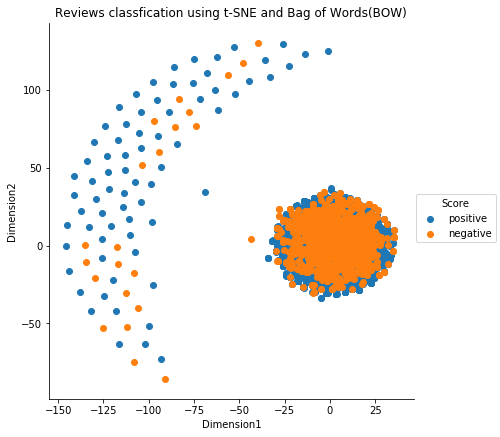

In [0]:
# Saving values to csv file for future ease
tsneBoWDataFrame.to_csv('bagOfWords.csv');
# Reading the stored csv file and storing it into dataframe for plotting
boWDataFrameForPlotting = pd.read_csv('bagOfWords.csv');
# Plotting data using seaborn library
sbrn.FacetGrid(boWDataFrameForPlotting, hue = "Score", size = 6).map(plt.scatter, "Dimension1", "Dimension2").add_legend()
# Setting title for the plot
plt.title("Reviews classfication using t-SNE and Bag of Words(BOW)");
# For showing the plot
plt.show();

### Observations:
1. We can see that only few of the data points are not overlapped. They are plotted on left side with half moon shaped structure.
2. There is huge overlap of of data points which are plotted on the right side like ball shape.
3. So by using bag of words strategy and t-sne we cannot classify above reviews which means that we cannot find such plane which could seperate two classes(positive, negative)

### Visualizing reviews classification by t-SNE using Tf-Idf strategy 

In [0]:
# Initializing count vectorizer for generating bigram bagofwords model
tfIdfVectorizer = TfidfVectorizer(ngram_range = (1, 2), min_df = 8);
# Generating tf-idf model for the text values of the reviews
tfIdfModel = tfIdfVectorizer.fit_transform(preProcessedReviewsWithoutStopWords);
print(tfIdfVectorizer.get_feature_names()[0:40]);
print(tfIdfModel.shape);

['ability', 'able', 'able buy', 'able find', 'able get', 'able make', 'able use', 'absolute', 'absolute best', 'absolute favorite', 'absolutely', 'absolutely delicious', 'absolutely love', 'absolutely loved', 'absolutely loves', 'absolutely no', 'acceptable', 'accident', 'according', 'account', 'acid', 'acid reflux', 'acidic', 'acidity', 'acquired', 'across', 'active', 'actual', 'actually', 'actually tastes', 'add', 'add little', 'add water', 'added', 'added bonus', 'added sugar', 'addict', 'addicted', 'addicting', 'addictive']
(5977, 4794)


In [0]:
# Converting sparse matrix to dense matrix
tfIdfModelInNumpyForm = tfIdfModel.todense();
# Storing the converted dense matrix into a dataframe
tfIdfModelDataFrame = pd.DataFrame(tfIdfModelInNumpyForm);
# Standardizing the values of the vectors
tfIdfStandardizedData = np.array(StandardScaler().fit_transform(tfIdfModelDataFrame));
# Intializing t_sne model
tsneModel = TSNE(n_components = 2, perplexity = 30, n_iter = 3000, random_state = 0);
# Calculuating t-sne values of the vectors generated by tfidf model
tsneTfIdfData = tsneModel.fit_transform(tfIdfStandardizedData);
# appending scores column to the tsne data generated
tsneTfIdfCombinedWithScoresData = np.hstack((tsneTfIdfData, scoresData[:, None]));
# storing data into dataframe for plotting
tsneTfIdfDataFrame = pd.DataFrame(tsneTfIdfCombinedWithScoresData, columns = ['Dimension1', 'Dimension2', 'Score']);

In [0]:
print(tsneTfIdfCombinedWithScoresData.shape);
tsneTfIdfDataFrame.head(5)

(5977, 3)


,Dimension1,Dimension2,Score
0,0.52330184,-3.2642562,positive
1,-0.80359054,-0.66377217,negative
2,3.2658846,-2.3054483,positive
3,0.80209565,4.959283,negative
4,1.406593,-1.6470314,positive


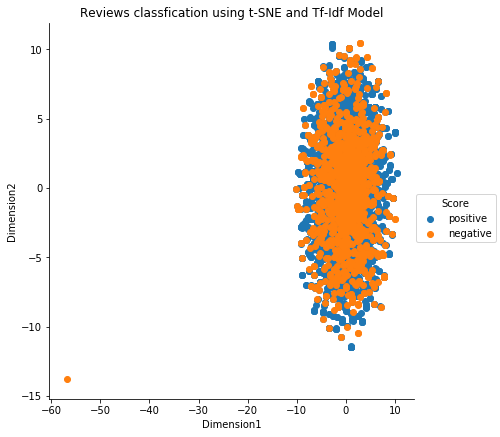

In [0]:
# Saving values to csv file for future ease
tsneTfIdfDataFrame.to_csv('tfIdf.csv');
# Reading the stored csv file and storing it into dataframe for plotting
tfIdfDataFrameForPlotting = pd.read_csv('tfIdf.csv');
# Plotting data using seaborn library
sbrn.FacetGrid(tfIdfDataFrameForPlotting, hue = "Score", size = 6).map(plt.scatter, "Dimension1", "Dimension2").add_legend();
# Setting title for the plot
plt.title("Reviews classfication using t-SNE and Tf-Idf Model");
# For showing the plot
plt.show();

### Observations:
All values are massively overlapped forming galaxy shaped structure at the right hand side. We cannot find such a plane which seperates two classes which means that we cannot classify reviews into positive and negative class using tf-idf strategy and t-SNE.

### Visualizing reviews classification by t-SNE using average Word2Vec model 

In [0]:
splittedPreProcessedReviewsWithStopWords = [];
# Loop for splitting each review into list of words for generating word2vec model
for review in preProcessedReviewsWithStopWords:
    splittedPreProcessedReviewsWithStopWords.append(review.split(" "));

In [0]:
print(len(splittedPreProcessedReviewsWithStopWords));

5977


In [0]:
# Generating word2Vec model for the list of review texts
word2VecModel = Word2Vec(splittedPreProcessedReviewsWithStopWords, size = 30, min_count = 4);
vocabulary = word2VecModel.wv.vocab.keys();

In [0]:
# Printing the words that are similar to quick according to generated word2Vec Model
word2VecModel.wv.most_similar('quick')

[('prepare', 0.9290837645530701),
 ('treat', 0.925791323184967),
 ('simple', 0.9117303490638733),
 ('Quick', 0.9085355997085571),
 ('versatile', 0.9039015173912048),
 ('palate', 0.8933108448982239),
 ('considering', 0.8886398673057556),
 ('truly', 0.8868892192840576),
 ('harsh', 0.8863140344619751),
 ('fast', 0.8857280611991882)]

In [0]:
# Printing the words that are similar to price according to generated word2Vec Model
word2VecModel.wv.most_similar('price')

[('deal', 0.8344111442565918),
 ('shipping', 0.8027724623680115),
 ('value', 0.7771466970443726),
 ('reasonable', 0.7417038679122925),
 ('product', 0.7122870087623596),
 ('worth', 0.712226152420044),
 ('description', 0.7121922969818115),
 ('item', 0.6942723989486694),
 ('packaging', 0.6824911832809448),
 ('beat', 0.6793037056922913)]

In [0]:
# Printing word2Vector of price
word2VecModel.wv['price']

array([-0.57406926,  1.2644154 ,  0.67618245,  1.4028666 ,  0.5369982 ,
       -1.1083666 ,  1.5970553 ,  0.35981965,  1.1070596 ,  0.9148106 ,
       -1.4987328 , -1.3975296 , -1.2018279 , -0.05921405, -0.93430984,
       -1.3714145 , -0.6930697 ,  0.37348288, -1.5632832 ,  3.3690996 ,
       -3.1305501 , -1.4742364 , -0.3534531 , -0.44216323, -0.4308758 ,
        1.7703276 , -0.11217603,  1.0639403 ,  0.11593418,  0.34753352],
      dtype=float32)

In [0]:
avgWord2VecReviewsVectors = [];
# Looping over splitted reviews list
for splittedReview in tqdm(splittedPreProcessedReviewsWithStopWords):
    # Initializing review vector which acts as temp array for storing computed vector of the review
    reviewVector = np.zeros(30);
    # Storing no of words in review for calculating average
    noOfWords = 0;
    # Looping over splitted review
    for word in splittedReview:
        # Only taking that word which is in vocabulary of generated word2Vec model
        if word in vocabulary:
            # Adding wordVector to avg vector
            reviewVector += word2VecModel.wv[word];
            # Incrementing number of words
            noOfWords += 1;
    # List of avg word2Vectors of the reviews text list
    avgWord2VecReviewsVectors.append(reviewVector / noOfWords);

In [0]:
# Printing the avg word2Vector of the first review
avgWord2VecReviewsVectors[0]

array([ 0.60205758,  0.67787945, -0.54578682,  0.15307187,  1.2761444 ,
       -1.52203818,  0.58927851,  0.12785406,  0.08174235,  0.48603708,
       -0.10800447, -0.47621375, -0.11315058, -0.62771196,  0.28018758,
        0.01350272, -0.46901969, -0.06973104, -0.25176413,  0.03582679,
       -0.43274402, -0.11654369, -0.25203064,  0.637003  ,  0.02489943,
        0.50285027, -0.1501406 ,  0.96298609, -0.08301652,  0.69563463])

In [0]:
# Storing the data into a dataframe
avgWord2VecModelDataFrame = pd.DataFrame(avgWord2VecReviewsVectors);
# Standardizing the values of the vectors
avgWord2VecStandardizedData = np.array(StandardScaler().fit_transform(avgWord2VecModelDataFrame));
# Intializing t_sne model
tsneModel = TSNE(n_components = 2, perplexity = 30, n_iter = 3000, random_state = 0);
# Calculuating t-sne values of the vectors generated by bagofwords model
tsneAvgWord2VecData = tsneModel.fit_transform(avgWord2VecStandardizedData);
# appending scores column to the tsne data generated
tsneAvgWord2VecCombinedWithScoresData = np.hstack((tsneAvgWord2VecData, scoresData[:, None]));
# storing data into dataframe for plotting
tsneAvgWord2VecDataFrame = pd.DataFrame(tsneAvgWord2VecCombinedWithScoresData, columns = ['Dimension1', 'Dimension2', 'Score']);

In [0]:
print(tsneAvgWord2VecDataFrame.shape)
tsneAvgWord2VecDataFrame.head(5)

(5977, 3)


,Dimension1,Dimension2,Score
0,12.381402,-25.326176,positive
1,7.8629284,3.6812735,negative
2,48.371597,27.694826,positive
3,29.658169,-13.288541,negative
4,69.45349,27.234118,positive


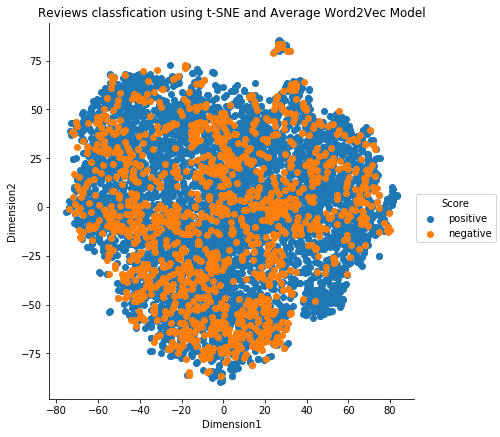

In [0]:
# Saving values to csv file for future ease
tsneAvgWord2VecDataFrame.to_csv('avgWord2Vec.csv');
# Reading the stored csv file and storing it into dataframe for plotting
avgWord2VecDataFrameForPlotting = pd.read_csv('avgWord2Vec.csv');
# Plotting data using seaborn library
sbrn.FacetGrid(avgWord2VecDataFrameForPlotting, hue = "Score", size = 6).map(plt.scatter, "Dimension1", "Dimension2").add_legend()
# Setting title for the plot
plt.title("Reviews classfication using t-SNE and Average Word2Vec Model");
# For showing the plot
plt.show();

### Observations:
There is huge overlap of points of two classes. We cannot find such a plane which seperates two classes which means that we cannot classify the reviews into positive and negative using average Word2Vec model and t-SNE.

### Visualizing reviews classification by t-SNE using average Tf-Idf Word2Vec model. 

In [0]:
# Initializing tfIdfVectorizer
tfIdfModel = TfidfVectorizer();
# Calculating tf-idf values of the reviews with stop words
tfIdfModel.fit_transform(preProcessedReviewsWithStopWords);
# Storing all idf values into dictionary
idfDictionary = dict(zip(tfIdfModel.get_feature_names(), list(tfIdfModel.idf_)));

In [0]:
idfDictionary['absolute']

6.261854138358737

In [0]:
# Getting all feature names of the tf-idf model
tfIdfWords = tfIdfModel.get_feature_names();
# Variable for storing average tf-idf vectors list
avgTfIdfVectors = []
# looping over all splitted reviews list
for splittedReview in tqdm(splittedPreProcessedReviewsWithStopWords):
    # Temp variable in loop for storing TfIdfVector of one review
    avgTfIdfVector = np.zeros(30);
    # Number of words used to calculate tf-idf values
    numberOfWordsInReview = len(splittedReview);
    # sum of all idfs of the words
    sumOfTfIdfs = 0
    for word in splittedReview:
        # If word in vocabulary of word2Vec model generated and tf-Idf model generated
        if word in vocabulary and word in tfIdfWords:
            # Calculating tf-idf value of word
            tfIdfValue = idfDictionary[word]*(splittedReview.count(word) / numberOfWordsInReview);
            # adding tf-idf value calculated to sum
            sumOfTfIdfs += tfIdfValue;
            # getting word2vector of the word
            w2Vector = word2VecModel.wv[word];
            # calculating average tf-idf word2Vector of the review
            avgTfIdfVector += tfIdfValue*w2Vector;
    # storing average tf-idf word2Vector into the list
    avgTfIdfVectors.append(avgTfIdfVector / sumOfTfIdfs);

In [0]:
print(len(tfIdfWords));
tfIdfWords[30:40]

14151


['abuse',
 'acacia',
 'academy',
 'acai',
 'accelerated',
 'acceleration',
 'accept',
 'acceptable',
 'accepted',
 'access']

In [0]:
# Storing the data into a dataframe
avgTfIdfModelDataFrame = pd.DataFrame(avgTfIdfVectors);
# Replacing all nan values with 0
avgTfIdfModelDataFrame[avgTfIdfModelDataFrame.isnull().any(axis = 1) == True] = 0;
# Standardizing the values of the vectors
avgTfIdfStandardizedData = np.array(StandardScaler().fit_transform(avgTfIdfModelDataFrame));
# Intializing t_sne model
tsneModel = TSNE(n_components = 2, perplexity = 30, n_iter = 3000, random_state = 0);
# Calculuating t-sne values of the vectors generated by avg tf-idf word2vec model
tsneAvgTfIdfData = tsneModel.fit_transform(avgTfIdfStandardizedData);
# appending scores column to the tsne data generated
tsneAvgTfIdfCombinedWithScoresData = np.hstack((tsneAvgTfIdfData, scoresData[:, None]));
# storing data into dataframe for plotting
tsneAvgTfIdfDataFrame = pd.DataFrame(tsneAvgTfIdfCombinedWithScoresData, columns = ['Dimension1', 'Dimension2', 'Score']);

In [0]:
somedataframe = avgTfIdfModelDataFrame;
# Printing data just to show which column has nan values. In data 37- row has all zeros. It must have nan values
somedataframe[somedataframe.isnull().any(axis = 1) == True] = 0;

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
30,-0.729066,0.407775,-0.502159,0.536918,1.027937,-0.405681,0.463756,0.350328,0.253115,1.079346,...,-1.520676,-0.176514,-0.900162,0.548007,0.194624,0.804829,-0.600786,0.584386,0.390329,0.366184
31,0.388197,0.882919,-0.208113,0.152327,0.433727,-1.029334,1.220922,0.066503,0.227240,1.078218,...,-0.367772,0.169188,-0.708853,1.155638,0.027219,0.327952,-0.506810,1.035034,-0.507349,0.257718
32,0.447077,0.673107,-0.567099,-0.029148,1.071694,-1.398731,0.632037,0.145381,0.055572,0.549188,...,-0.657590,0.049105,-0.563346,0.747467,0.179256,0.608162,-0.397917,0.991008,-0.448859,0.035264
33,0.298008,0.902740,-0.386566,-0.002189,0.713683,-0.943713,0.953730,-0.003004,0.366443,0.882189,...,-0.458690,0.098551,-0.410817,1.050481,0.180265,0.369161,-0.520500,0.871440,-0.165534,0.064816
34,0.475176,0.636131,-0.320413,-0.326613,0.968140,-1.086490,0.439553,0.007284,-0.091544,0.647534,...,-0.821619,-0.248741,-0.583969,0.586340,0.263876,0.403606,-0.432192,1.046019,-0.238027,0.605109
35,-0.074807,0.850754,-0.361334,0.376266,0.938534,-0.934654,0.750364,0.321245,0.305248,0.763907,...,-0.925959,-0.140370,-0.530438,0.415123,0.646021,0.407604,-0.446682,0.995119,0.199514,0.215836
36,0.355550,0.411012,-0.269847,-0.194739,0.904076,-1.285082,0.626426,0.261268,0.124503,0.160124,...,-0.567382,-0.182242,-0.277987,0.473236,0.486942,0.583972,0.216691,1.117858,-0.398136,0.328672
37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
38,0.427530,0.435931,-0.413437,0.227144,0.987639,-0.897066,0.235067,-0.015175,0.484912,1.126861,...,-0.550158,-0.151007,-0.044586,1.162668,0.460474,0.315042,-0.701057,0.726065,-0.001208,0.857313
39,-0.580407,0.740045,-0.758090,0.621863,0.898287,-0.218481,0.397716,0.595488,0.302819,1.036370,...,-1.106100,-0.042310,-0.935501,0.147663,0.839867,0.273937,-0.679862,0.768996,0.454404,0.260333


In [0]:
tsneAvgTfIdfDataFrame.head(5)

,Dimension1,Dimension2,Score
0,-53.353714,-29.472395,positive
1,-31.996437,-14.974074,negative
2,13.288889,-20.630127,positive
3,6.862736,-14.785289,negative
4,-8.685272,-16.803284,positive


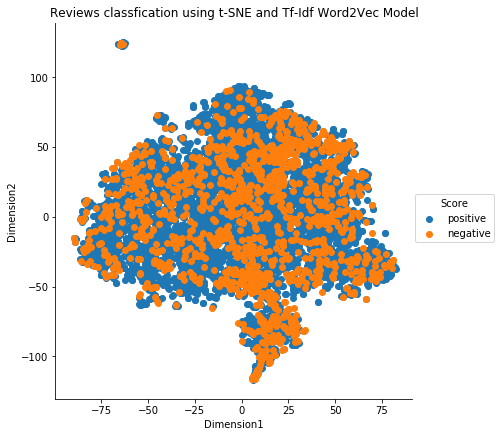

In [0]:
# Saving values to csv file for future ease
tsneAvgTfIdfDataFrame.to_csv('avgTfIdf.csv');
# Reading the stored csv file and storing it into dataframe for plotting
avgTfIdfDataFrameForPlotting = pd.read_csv('avgTfIdf.csv');
# Plotting data using seaborn library
sbrn.FacetGrid(avgTfIdfDataFrameForPlotting, hue = "Score", size = 6).map(plt.scatter, "Dimension1", "Dimension2").add_legend()
# Setting title for the plot
plt.title("Reviews classfication using t-SNE and Tf-Idf Word2Vec Model");
# For showing the plot
plt.show();

### Observations:
There is huge overlap of datapoints in above plot. We cannot find such a plane which seperates two classes which means that we cannot classify reviews into positive and negative using average tf-Idf word2Vec model and t-SNE.

## Conclusion:
The above dataset is not seperable in the view of t-SNE. We cannot build model for the above problem using t-SNE.
It seems this problem is not seperable in 2-Dimesions, but it may be seperable in higher dimensions.

In [0]:
def equalsBorder(number):
    print("="*number);

### Balancing Dataset

In [0]:
print("Testing whether data is balanced: ");
equalsBorder(70);
numberOfPositiveReviews = len(scoresData[scoresData == 'positive']);
numberOfNegativeReviews = len(scoresData[scoresData == 'negative']);
print("Number of positive reviews: ", numberOfPositiveReviews);
print("Number of negative reviews: ", numberOfNegativeReviews);

In [0]:
imbalancedDataFrame = pd.DataFrame({'review': preProcessedReviewsWithoutStopWords, 'polarity': scoresData});
positiveData = imbalancedDataFrame[imbalancedDataFrame.polarity == 'positive'];
negativeData = imbalancedDataFrame[imbalancedDataFrame.polarity == 'negative'];
negativeDataBalanced = resample(negativeData, replace = True, n_samples = 4635, random_state = 44);
balancedData = pd.concat([positiveData, negativeDataBalanced]);
balancedData = shuffle(balancedData);
scoresData = balancedData.polarity;
preProcessedReviewsWithoutStopWords = balancedData.review;
print("Testing whether data is balanced: ");
equalsBorder(70);
numberOfPositiveReviews = len(scoresData[scoresData == 'positive']);
numberOfNegativeReviews = len(scoresData[scoresData == 'negative']);
print("Number of positive reviews: ", numberOfPositiveReviews);
print("Number of negative reviews: ", numberOfNegativeReviews);

In [0]:
scoresDataInBinaryForm = list(map(lambda x: 1 if x == 'positive' else 0, scoresData));
print(len(scoresDataInBinaryForm));
scoresDataInBinaryForm[0:10]

88424


[1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

### Splitting dataset into train, cross-validate, test datasets

In [0]:
reviewsTrainAndCrossValidate, reviewsTest, classesTrainAndCrossValidate, classesTest = model_selection.train_test_split(preProcessedReviewsWithoutStopWords, scoresDataInBinaryForm, test_size = 0.3, random_state = 0, stratify = scoresDataInBinaryForm);
reviewsTrain, reviewsCrossValidate, classesTrain, classesCrossValidate = model_selection.train_test_split(reviewsTrainAndCrossValidate, classesTrainAndCrossValidate, test_size = 0.3, random_state = 0, stratify = classesTrainAndCrossValidate);

In [0]:
print("Shapes of splitted data");
print("="*70);
print("After first split");
equalsBorder(40);
print("Reviews in both train and cross validate dataset: ", len(reviewsTrainAndCrossValidate));
print("Classes of both train and cross validate dataset: ", len(classesTrainAndCrossValidate));
print("Reviews in test dataset: ", len(reviewsTest));
print("Classes of test dataset: ", len(classesTest));
equalsBorder(40);
print("After second split");
equalsBorder(40);
print("Reviews in train dataset: ", len(reviewsTrain));
print("Classes of train dataset: ", len(classesTrain));
print("Reviews in cross validate dataset: ", len(reviewsCrossValidate));
print("Classes of cross validate: ", len(classesCrossValidate));

Shapes of splitted data
After first split
Reviews in both train and cross validate dataset:  61896
Classes of both train and cross validate dataset:  61896
Reviews in test dataset:  26528
Classes of test dataset:  26528
After second split
Reviews in train dataset:  43327
Classes of train dataset:  43327
Reviews in cross validate dataset:  18569
Classes of cross validate:  18569


In [0]:
resultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Hyper Parameter - K', 'AUC', 'Accuracy']);
resultsDataFrame

,Vectorizer,Model,Hyper Parameter - K,AUC,Accuracy


### Note Points: 
#### 1.Though we may perform below analysis with single loop I have done it individually just for good readability.
#### 2. I have used time based splitting for below analysis of reviews
#### 3. I have balanced dataset inorder to talk in terms of accuracy

# 5.Reviews Classification using K-NN

## Vectorizing only train dataset for below analysis

## Bag of Words and K-NN for classification

### Bag of Words & K-NN(brute)

In [0]:
countVectorizer = CountVectorizer(min_df = 4);
bowModel = countVectorizer.fit_transform(reviewsTrain);
print("Bag of words representation overview");
equalsBorder(70);
print("First 10 features(words): ");
print(countVectorizer.get_feature_names()[0:9]);
equalsBorder(70);
print("Last 10 features(words): ");
print(countVectorizer.get_feature_names()[-10:]);
equalsBorder(70);
print("Shape of bag of words(unigram) model: ", bowModel.shape);
print("Number of features: ", len(countVectorizer.get_feature_names()));
equalsBorder(70);
print("Array representation of bag of words: ");
bowTrainData = bowModel.toarray();
print(bowTrainData);

Bag of words representation overview
First 10 features(words): 
['ability', 'able', 'absolute', 'absolutely', 'absorb', 'acceptable', 'accident', 'accidentally', 'accommodate']
Last 10 features(words): 
['yuck', 'yucky', 'yum', 'yummy', 'zero', 'zest', 'zip', 'zucchini', 'zukes', 'zupas']
Shape of bag of words(unigram) model:  (4866, 4627)
Number of features:  4627
Array representation of bag of words: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


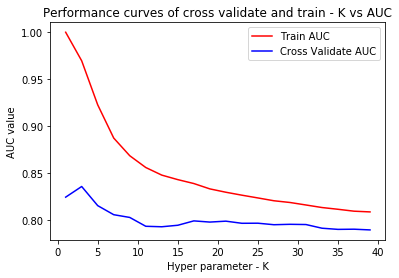

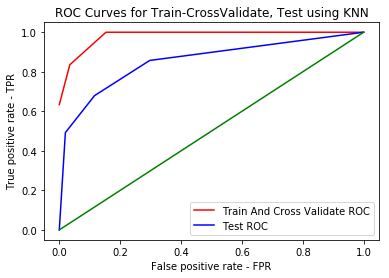

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesTrain = [];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    # Training data using knnClassifier with train data as input
    knnClassifier.fit(bowTrainData, classesTrain);
    # Probability scores of train data using knnClassifier
    predProbScoresTrain = knnClassifier.predict_proba(bowTrainData);
    # fpr, tpr generation using roc_curve on train data
    fpr, tpr, threshold = roc_curve(classesTrain, predProbScoresTrain[:, 1]);
    # auc value of above roc curve values generated
    areaUnderRocValuesTrain.append(auc(fpr, tpr));
    # Transforming cross validation dataset reviews to bag of words representation
    bowCrossValidateData = countVectorizer.transform(reviewsCrossValidate);
    # Probability scores of cross validation data using knnClassifier
    predProbScoresCrossValidate = knnClassifier.predict_proba(bowCrossValidateData);
    fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label='Train AUC');
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='brute');
# Transforming train and cross-validate data to bag of words representation
bowTrainAndCrossValidate = countVectorizer.transform(reviewsTrainAndCrossValidate);
knnClassifier.fit(bowTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(bowTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
bowTestData = countVectorizer.transform(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(bowTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Bag of words vectorization and brute force algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(bowTestData.todense());
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Bag of words', 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);

Results of reviews analysis using Bag of words vectorization and brute force algorithm:
AUC values of cross-validate data: 
[0.8242771011147222, 0.835622513136713, 0.8152363089633387, 0.8055728518057286, 0.8026561977948546, 0.7932334538164809, 0.7927208942076968, 0.7943238769249461, 0.7989771588251375, 0.7977189199040184, 0.7986863287063753, 0.7964219542569024, 0.7965077605321509, 0.7948979436867843, 0.7953330498435743, 0.7950930960119065, 0.7911710658202473, 0.7899356073261853, 0.7901231661756218, 0.789358503174073]
Optimal K-Value:  3
AUC value of test data:  0.8531085134995344
Accuracy score on test data:  0.7824523552678893
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1238,162
Actual: YES,443,938


### Bag of Words & K-NN(kd-tree)

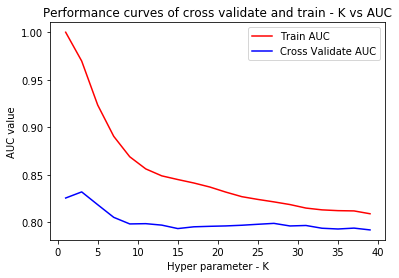

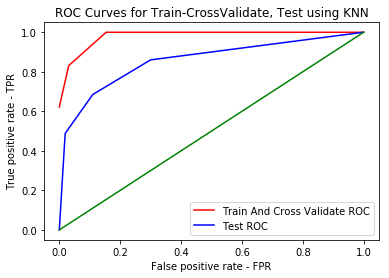

In [0]:
bowModelDenseForm = bowModel.todense();
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesTrain = [];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'kd_tree');
    # Training data using knnClassifier with train data as input
    knnClassifier.fit(bowModelDenseForm, classesTrain);
    # Probability scores of train data using knnClassifier
    predProbScoresTrain = knnClassifier.predict_proba(bowModelDenseForm);
    # fpr, tpr generation using roc_curve on train data
    fpr, tpr, threshold = roc_curve(classesTrain, predProbScoresTrain[:, 1]);
    # auc value of above roc curve values generated
    areaUnderRocValuesTrain.append(auc(fpr, tpr));
    # Transforming cross validation dataset reviews to bag of words representation
    bowCrossValidateData = countVectorizer.transform(reviewsCrossValidate);
    # Probability scores of cross validation data using knnClassifier
    predProbScoresCrossValidate = knnClassifier.predict_proba(bowCrossValidateData.todense());
    fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label='Train AUC');
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='kd_tree');
# Transforming train and cross-validate data to bag of words representation
bowTrainAndCrossValidate = countVectorizer.transform(reviewsTrainAndCrossValidate);
bowTrainAndCrossValidateDenseForm = bowTrainAndCrossValidate.todense();
knnClassifier.fit(bowTrainAndCrossValidateDenseForm, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(bowTrainAndCrossValidateDenseForm);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
bowTestData = countVectorizer.transform(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(bowTestData.todense());
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Bag of words vectorization and kd-tree algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(bowTestData.todense());
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Bag of words', 'Model': 'kd-tree', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);

Results of reviews analysis using Bag of words vectorization and kd-tree algorithm:
AUC values of cross-validate data: 
[0.8255095222185097, 0.8319480302524072, 0.8184673328676002, 0.8051726756370926, 0.7982352762506454, 0.7985169941985846, 0.796979315372232, 0.7933473559517662, 0.7952054794520548, 0.7957309479695046, 0.7961387176138262, 0.796856301066124, 0.7978783828934181, 0.7988268080065607, 0.7961045469732407, 0.7966019196306533, 0.7937012119187195, 0.7929061750144276, 0.7938348570907875, 0.7919372475169335]
Optimal K-Value:  3
AUC value of test data:  0.8557985931519602
Accuracy score on test data:  0.7882056814095649
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1246,154
Actual: YES,435,946


## Tf-Idf and K-NN for classification of reviews

### Tf-Idf & K-NN(brute)

In [0]:
tfIdfVectorizer = TfidfVectorizer(min_df = 4);
tfIdfModel = tfIdfVectorizer.fit_transform(reviewsTrain);
print("TfIdf representation overview");
equalsBorder(70);
print("First 10 features(words): ");
print(tfIdfVectorizer.get_feature_names()[0:9]);
equalsBorder(70);
print("Last 10 features(words): ");
print(tfIdfVectorizer.get_feature_names()[-10:]);
equalsBorder(70);
print("Shape of TfIdf Model: ", tfIdfModel.shape);
print("Number of features: ", len(tfIdfVectorizer.get_feature_names()));
print("Array representation of TfIdf: ");
equalsBorder(70);
tfIdfTrainData = tfIdfModel.toarray();
tfIdfModelDenseForm = tfIdfModel.todense();
print(tfIdfTrainData);

TfIdf representation overview
First 10 features(words): 
['abbott', 'ability', 'able', 'absence', 'absolute', 'absolutely', 'absorb', 'absorbed', 'acai']
Last 10 features(words): 
['yum', 'yummy', 'yuppies', 'zero', 'zest', 'zico', 'zinc', 'zip', 'zucchini', 'zukes']
Shape of TfIdf Model:  (4866, 4606)
Number of features:  4606
Array representation of TfIdf: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


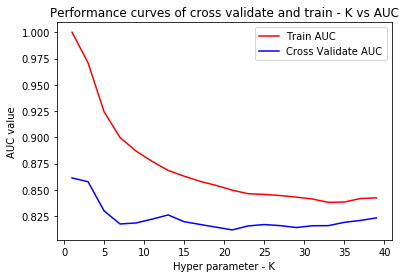

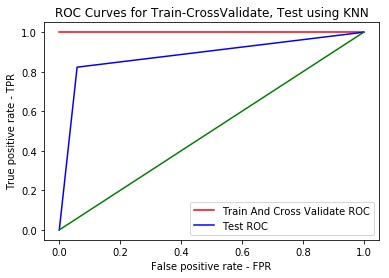

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesTrain = [];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    # Training data using knnClassifier with train data as input
    knnClassifier.fit(tfIdfTrainData, classesTrain);
    # Probability scores of train data using knnClassifier
    predProbScoresTrain = knnClassifier.predict_proba(tfIdfTrainData);
    # fpr, tpr generation using roc_curve on train data
    fpr, tpr, threshold = roc_curve(classesTrain, predProbScoresTrain[:, 1]);
    # auc value of above roc curve values generated
    areaUnderRocValuesTrain.append(auc(fpr, tpr));
    # Transforming cross validation dataset reviews to bag of words representation
    tfIdfCrossValidateData = tfIdfVectorizer.transform(reviewsCrossValidate);
    # Probability scores of cross validation data using knnClassifier
    predProbScoresCrossValidate = knnClassifier.predict_proba(tfIdfCrossValidateData);
    fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label='Train AUC');
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='brute');
# Transforming train and cross-validate data to bag of words representation
tfIdfTrainAndCrossValidate = tfIdfVectorizer.transform(reviewsTrainAndCrossValidate);
knnClassifier.fit(tfIdfTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(tfIdfTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
tfIdfTestData = tfIdfVectorizer.transform(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(tfIdfTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Tf-Idf vectorization and brute force algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(tfIdfTestData.todense());
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Tf-Idf', 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Tf-Idf vectorization and brute force algorithm:
AUC values of cross-validate data: 
[0.8613173161619537, 0.8576853567414878, 0.8299441120189532, 0.8174733469003432, 0.8184551833065031, 0.8221122011967317, 0.8260691613765453, 0.8196283752999423, 0.8170093855359476, 0.8144382346687725, 0.8118283570756007, 0.8156425599125233, 0.8169190231752878, 0.815899978738268, 0.8140957689153479, 0.8158156911581569, 0.8158908665674452, 0.8190467150624183, 0.8208600370561613, 0.8232762810193481]
Optimal K-Value:  1
AUC value of test data:  0.8823725043964
Accuracy score on test data:  0.8827759798633585
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1318,82
Actual: YES,244,1137


### Tf-Idf & K-NN(kd-tree)

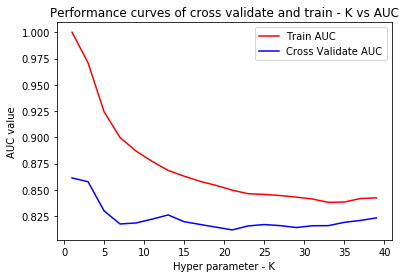

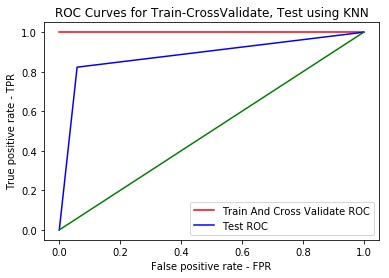

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesTrain = [];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'kd_tree');
    # Training data using knnClassifier with train data as input
    knnClassifier.fit(tfIdfModelDenseForm, classesTrain);
    # Probability scores of train data using knnClassifier
    predProbScoresTrain = knnClassifier.predict_proba(tfIdfModelDenseForm);
    # fpr, tpr generation using roc_curve on train data
    fpr, tpr, threshold = roc_curve(classesTrain, predProbScoresTrain[:, 1]);
    # auc value of above roc curve values generated
    areaUnderRocValuesTrain.append(auc(fpr, tpr));
    # Transforming cross validation dataset reviews to bag of words representation
    tfIdfCrossValidateData = tfIdfVectorizer.transform(reviewsCrossValidate);
    # Probability scores of cross validation data using knnClassifier
    predProbScoresCrossValidate = knnClassifier.predict_proba(tfIdfCrossValidateData.todense());
    fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label='Train AUC');
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='kd_tree');
# Transforming train and cross-validate data to tf-idf representation
tfIdfTrainAndCrossValidate = tfIdfVectorizer.transform(reviewsTrainAndCrossValidate);
tfIdfTrainAndCrossValidateDenseForm = tfIdfTrainAndCrossValidate.todense();
knnClassifier.fit(tfIdfTrainAndCrossValidateDenseForm, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(tfIdfTrainAndCrossValidateDenseForm);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into tf-idf representation
tfIdfTestData = tfIdfVectorizer.transform(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(tfIdfTestData.todense());
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Tf-Idf vectorization and kd-tree algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(tfIdfTestData.todense());
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Tf-Idf', 'Model': 'kd-tree', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Tf-Idf vectorization and kd-tree algorithm:
AUC values of cross-validate data: 
[0.8613173161619537, 0.8576853567414878, 0.8299441120189532, 0.8174733469003432, 0.8184551833065031, 0.8221122011967317, 0.8260691613765453, 0.8196283752999423, 0.8170093855359476, 0.8144382346687725, 0.8118283570756007, 0.8156425599125233, 0.8169190231752878, 0.815899978738268, 0.8140957689153479, 0.8158156911581569, 0.8158908665674452, 0.8190467150624183, 0.8208600370561613, 0.8232762810193481]
Optimal K-Value:  1
AUC value of test data:  0.8823725043964
Accuracy score on test data:  0.8827759798633585
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1318,82
Actual: YES,244,1137


## Average Word2Vec & K-NN for classification

### Average Word2Vec & K-NN(brute)

In [0]:
splittedReviewTexts = [];
for review in tqdm(reviewsTrain):
    splittedReviewTexts.append(review.split());
equalsBorder(70);
print("Shape of splitted reviews: ", len(splittedReviewTexts));
print("Sample elements: ", splittedReviewTexts[444:446]);
equalsBorder(70);

Shape of splitted reviews:  4866
Sample elements:  [['wife', 'like', 'better', 'swedish', 'version', 'wasa', 'finds', 'taste', 'better', 'likes', 'thinness', 'product', 'buy'], ['not', 'know', 'toddler', 'crazy', 'snacking', 'many', 'cheerios', 'every', 'day', 'desperate', 'find', 'something', 'else', 'would', 'like', 'would', 'not', 'require', 'refrigeration', 'saved', 'day', 'feel', 'good', 'feeding', 'healthier', 'snacks', 'positively', 'love']]


In [0]:
word2VecModel = Word2Vec(splittedReviewTexts, size = 30, min_count = 4);
vocabulary = word2VecModel.wv.vocab.keys();

In [0]:
word2VecModel.wv.most_similar("price")

[('find', 0.981781005859375),
 ('cheaper', 0.9788991212844849),
 ('purchase', 0.9782506227493286),
 ('could', 0.9772183895111084),
 ('buy', 0.9735983610153198),
 ('buying', 0.9718260765075684),
 ('stores', 0.967705249786377),
 ('online', 0.9673184156417847),
 ('order', 0.9646515846252441),
 ('get', 0.9629007577896118)]

In [0]:
word2VecModel.wv['price']

array([ 1.390419  ,  0.5719519 ,  0.5160384 , -0.6147009 ,  0.39645872,
       -0.4816022 ,  0.00288615, -1.268192  , -0.05973065, -0.52015215,
        0.3319112 , -1.2109288 , -0.37818116, -0.5927169 , -0.00537881,
       -0.42278746, -0.43487775,  0.10984264,  0.02415674,  0.04714812,
        0.4906209 ,  0.36142674, -0.86147106, -1.3050896 , -0.21165743,
        0.08730263, -0.09146389,  0.4555987 ,  1.8066223 , -1.1767036 ],
      dtype=float32)

In [0]:
avgWord2VecRepresentation = [];
for splittedReview in tqdm(splittedReviewTexts):
    reviewsVector = np.zeros(30);
    noOfWordsPerReview = 0;
    for word in splittedReview:
        if word in vocabulary:
            reviewsVector += word2VecModel.wv[word];
            noOfWordsPerReview += 1;
    reviewsVector = reviewsVector / noOfWordsPerReview;
    avgWord2VecRepresentation.append(reviewsVector);
print("Average word2vec representation overview: ");
equalsBorder(70);
print("Shape of avg word2vector representation: ", len(avgWord2VecRepresentation));
print("Sample vector: ", avgWord2VecRepresentation[444]);

Average word2vec representation overview: 
Shape of avg word2vector representation:  4866
Sample vector:  [ 0.75552701  0.27052382  0.64085697 -0.23448199  0.25776814 -0.68847581
  0.02776032 -0.52857506 -0.73912911 -0.06951589  0.30849076 -0.75966305
 -0.4689813  -0.08630457  0.33013236 -0.40716771 -0.1346558  -0.25865546
  0.20192041  0.06139738  0.61134179  0.28622335 -0.23268134 -1.04533781
  0.04708409 -0.15546728  0.17974212  0.28583361  1.44102114 -0.65997479]


In [0]:
def getAvgWord2VecRepresentation(reviewTexts):
    splittedReviewTexts = [];
    for review in reviewTexts:
        splittedReviewTexts.append(review.split());
    avgWord2VecRepresentation = [];
    for splittedReview in splittedReviewTexts:
        reviewsVector = np.zeros(30);
        noOfWordsPerReview = 0;
        for word in splittedReview:
            if word in vocabulary:
                reviewsVector += word2VecModel.wv[word];
                noOfWordsPerReview += 1;
        reviewsVector = reviewsVector / noOfWordsPerReview;
        avgWord2VecRepresentation.append(reviewsVector);
    return avgWord2VecRepresentation;

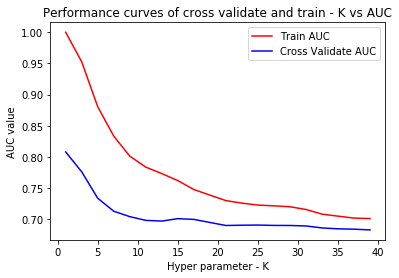

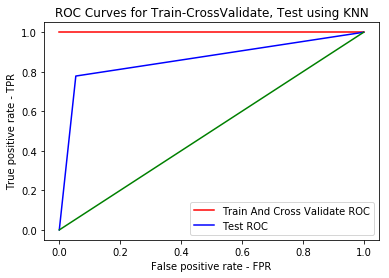

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesTrain = [];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    # Training data using knnClassifier with train data as input
    knnClassifier.fit(avgWord2VecRepresentation, classesTrain);
    # Probability scores of train data using knnClassifier
    predProbScoresTrain = knnClassifier.predict_proba(avgWord2VecRepresentation);
    # fpr, tpr generation using roc_curve on train data
    fpr, tpr, threshold = roc_curve(classesTrain, predProbScoresTrain[:, 1]);
    # auc value of above roc curve values generated
    areaUnderRocValuesTrain.append(auc(fpr, tpr));
    # Transforming cross validation dataset reviews to bag of words representation
    avgWord2VecCrossValidateData = getAvgWord2VecRepresentation(reviewsCrossValidate);
    # Probability scores of cross validation data using knnClassifier
    predProbScoresCrossValidate = knnClassifier.predict_proba(avgWord2VecCrossValidateData);
    fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label='Train AUC');
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='brute');
# Transforming train and cross-validate data to bag of words representation
avgWord2VecTrainAndCrossValidate = getAvgWord2VecRepresentation(reviewsTrainAndCrossValidate);
knnClassifier.fit(avgWord2VecTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(avgWord2VecTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
avgWord2VecTestData = getAvgWord2VecRepresentation(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(avgWord2VecTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Avg Word2Vector vectorization and brute force algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(avgWord2VecTestData);
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Avg Word2Vec', 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Avg Word2Vector vectorization and brute force algorithm:
AUC values of cross-validate data: 
[0.8081265376788264, 0.7763561947574644, 0.7339754882604865, 0.7131686055341251, 0.7044771132642833, 0.6984888983385475, 0.6973369680770283, 0.7012536828357075, 0.7000394860735656, 0.6951303040427663, 0.6902719982990615, 0.6907139385839687, 0.6909660419767336, 0.6903760289159555, 0.6902909819882757, 0.6895042979072381, 0.686371229839322, 0.6849178385930808, 0.6843604774777511, 0.6831774139659205]
Optimal K-Value:  1
AUC value of test data:  0.8620678597289748
Accuracy score on test data:  0.8626393383674937
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1324,76
Actual: YES,306,1075


### Average Word2Vec and K-NN(kd-tree)

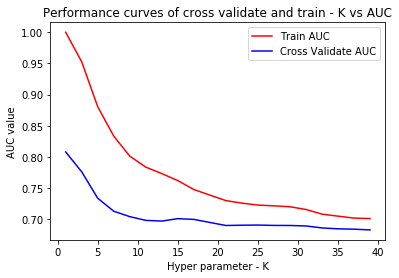

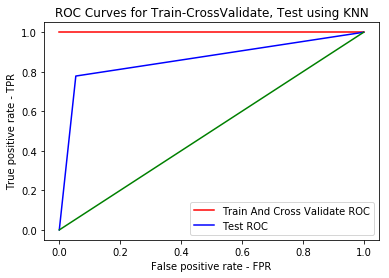

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesTrain = [];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'kd_tree');
    # Training data using knnClassifier with train data as input
    knnClassifier.fit(avgWord2VecRepresentation, classesTrain);
    # Probability scores of train data using knnClassifier
    predProbScoresTrain = knnClassifier.predict_proba(avgWord2VecRepresentation);
    # fpr, tpr generation using roc_curve on train data
    fpr, tpr, threshold = roc_curve(classesTrain, predProbScoresTrain[:, 1]);
    # auc value of above roc curve values generated
    areaUnderRocValuesTrain.append(auc(fpr, tpr));
    # Transforming cross validation dataset reviews to bag of words representation
    avgWord2VecCrossValidateData = getAvgWord2VecRepresentation(reviewsCrossValidate);
    # Probability scores of cross validation data using knnClassifier
    predProbScoresCrossValidate = knnClassifier.predict_proba(avgWord2VecCrossValidateData);
    fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label='Train AUC');
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='kd_tree');
# Transforming train and cross-validate data to tf-idf representation
avgWord2VecTrainAndCrossValidate = getAvgWord2VecRepresentation(reviewsTrainAndCrossValidate);
knnClassifier.fit(avgWord2VecTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(avgWord2VecTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into tf-idf representation
avgWord2VecTestData = getAvgWord2VecRepresentation(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(avgWord2VecTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Average Word2Vector vectorization and kd-tree algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(avgWord2VecTestData);
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Avg Word2Vec', 'Model': 'kd-tree', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Average Word2Vector vectorization and kd-tree algorithm:
AUC values of cross-validate data: 
[0.8081265376788264, 0.7763561947574644, 0.7339754882604865, 0.7131686055341251, 0.7044771132642833, 0.6984888983385475, 0.6973369680770283, 0.7012536828357075, 0.7000394860735656, 0.6951303040427663, 0.6902719982990615, 0.6907139385839687, 0.6909660419767336, 0.6903760289159555, 0.6902909819882757, 0.6895042979072381, 0.686371229839322, 0.6849178385930808, 0.6843604774777511, 0.6831774139659205]
Optimal K-Value:  1
AUC value of test data:  0.8620678597289748
Accuracy score on test data:  0.8626393383674937
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1324,76
Actual: YES,306,1075


## Average Tf-Idf and K-NN for classification

### Average Tf-Idf & K-NN(brute)

In [0]:
idfDictionary = dict(zip(tfIdfVectorizer.get_feature_names(), tfIdfVectorizer.idf_));
print("Sample Idf Values: ");
equalsBorder(70);
print("Idf value of 'quick': ", idfDictionary['quick']);
print("Idf value of 'price': ", idfDictionary['price']);

Sample Idf Values: 
Idf value of 'quick':  4.875112492992194
Idf value of 'price':  3.291754293341146


In [0]:
avgTfIdfRepresentation = [];
tfIdfFeatureNames = tfIdfVectorizer.get_feature_names();
for splittedReview in tqdm(splittedReviewTexts):
    sumTfIdfsOfWordsInReview = 0;
    tfIdfWord2VecProductReview = np.zeros(30);
    for word in splittedReview:
        if word in vocabulary and word in tfIdfFeatureNames:
            tfIdfWordValue = idfDictionary[word] * splittedReview.count(word) / len(word);
            tfIdfWord2VecProductReview += tfIdfWordValue * word2VecModel.wv[word];
            sumTfIdfsOfWordsInReview += tfIdfWordValue;
    avgTfIdfRepresentation.append(tfIdfWord2VecProductReview / sumTfIdfsOfWordsInReview);

In [0]:
def getAvgTfIdfRepresentation(reviewTexts):
    splittedReviewTexts = [];
    for review in reviewTexts:
        splittedReviewTexts.append(review.split());
    avgTfIdfRepresentation = [];
    tfIdfFeatureNames = tfIdfVectorizer.get_feature_names();
    for splittedReview in splittedReviewTexts:
        sumTfIdfsOfWordsInReview = 0;
        tfIdfWord2VecProductReview = np.zeros(30);
        for word in splittedReview:
            if word in vocabulary and word in tfIdfFeatureNames:
                tfIdfWordValue = idfDictionary[word] * splittedReview.count(word) / len(word);
                tfIdfWord2VecProductReview += tfIdfWordValue * word2VecModel.wv[word];
                sumTfIdfsOfWordsInReview += tfIdfWordValue;
        avgTfIdfRepresentation.append(tfIdfWord2VecProductReview / sumTfIdfsOfWordsInReview);
    return avgTfIdfRepresentation;

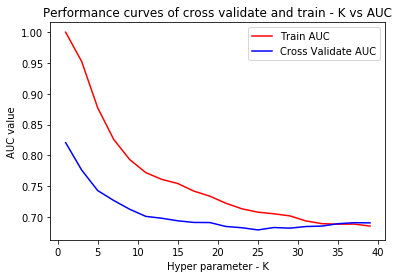

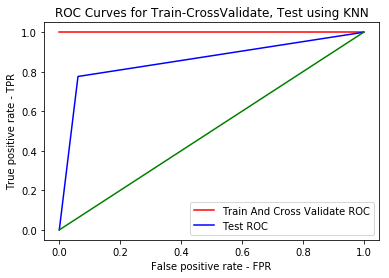

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesTrain = [];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    # Training data using knnClassifier with train data as input
    knnClassifier.fit(avgTfIdfRepresentation, classesTrain);
    # Probability scores of train data using knnClassifier
    predProbScoresTrain = knnClassifier.predict_proba(avgTfIdfRepresentation);
    # fpr, tpr generation using roc_curve on train data
    fpr, tpr, threshold = roc_curve(classesTrain, predProbScoresTrain[:, 1]);
    # auc value of above roc curve values generated
    areaUnderRocValuesTrain.append(auc(fpr, tpr));
    # Transforming cross validation dataset reviews to bag of words representation
    avgTfIdfCrossValidateData = getAvgTfIdfRepresentation(reviewsCrossValidate);
    # Probability scores of cross validation data using knnClassifier
    predProbScoresCrossValidate = knnClassifier.predict_proba(avgTfIdfCrossValidateData);
    fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label='Train AUC');
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='brute');
# Transforming train and cross-validate data to bag of words representation
avgTfIdfTrainAndCrossValidate = getAvgTfIdfRepresentation(reviewsTrainAndCrossValidate);
knnClassifier.fit(avgTfIdfTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(avgTfIdfTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
avgTfIdfTestData = getAvgTfIdfRepresentation(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(avgTfIdfTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Avg Tf-Idf vectorization and brute force algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(avgTfIdfTestData);
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Avg Tf-Idf', 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Avg Tf-Idf vectorization and brute force algorithm:
AUC values of cross-validate data: 
[0.8205023843513654, 0.7760000607478055, 0.742713300732011, 0.7266029827172494, 0.7123135801719163, 0.7007737751723718, 0.6977341068553898, 0.6935956626066884, 0.6909349087264223, 0.6907169759742429, 0.6843787018193966, 0.6823299820793974, 0.6787709200255141, 0.6826618169668622, 0.681618473407648, 0.6842853020684628, 0.6850082009537405, 0.6888436655225829, 0.6904982838744951, 0.6902158065789873]
Optimal K-Value:  1
AUC value of test data:  0.8574102617151134
Accuracy score on test data:  0.8579647608773823
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1314,86
Actual: YES,309,1072


### Average Tf-Idf & K-NN(kd-tree)

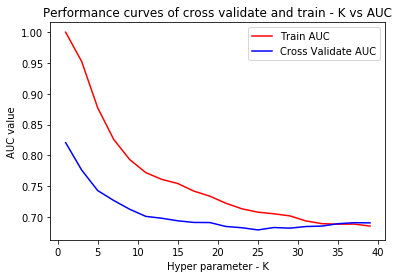

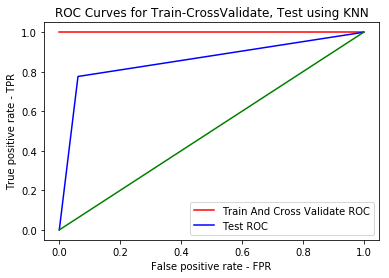

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesTrain = [];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'kd_tree');
    # Training data using knnClassifier with train data as input
    knnClassifier.fit(avgTfIdfRepresentation, classesTrain);
    # Probability scores of train data using knnClassifier
    predProbScoresTrain = knnClassifier.predict_proba(avgTfIdfRepresentation);
    # fpr, tpr generation using roc_curve on train data
    fpr, tpr, threshold = roc_curve(classesTrain, predProbScoresTrain[:, 1]);
    # auc value of above roc curve values generated
    areaUnderRocValuesTrain.append(auc(fpr, tpr));
    # Transforming cross validation dataset reviews to bag of words representation
    avgTfIdfCrossValidateData = getAvgTfIdfRepresentation(reviewsCrossValidate);
    # Probability scores of cross validation data using knnClassifier
    predProbScoresCrossValidate = knnClassifier.predict_proba(avgTfIdfCrossValidateData);
    fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label='Train AUC');
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='kd_tree');
# Transforming train and cross-validate data to tf-idf representation
avgTfIdfTrainAndCrossValidate = getAvgTfIdfRepresentation(reviewsTrainAndCrossValidate);
knnClassifier.fit(avgTfIdfTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(avgTfIdfTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into tf-idf representation
avgTfIdfTestData = getAvgTfIdfRepresentation(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(avgTfIdfTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Average Tf-Idf vectorization and kd-tree algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(avgTfIdfTestData);
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Avg Tf-Idf', 'Model': 'kd-tree', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Average Tf-Idf vectorization and kd-tree algorithm:
AUC values of cross-validate data: 
[0.8205023843513654, 0.7760000607478055, 0.742713300732011, 0.7266029827172494, 0.7123135801719163, 0.7007737751723718, 0.6977341068553898, 0.6935956626066884, 0.6909349087264223, 0.6907169759742429, 0.6843787018193966, 0.6823299820793974, 0.6787709200255141, 0.6826618169668622, 0.681618473407648, 0.6842853020684628, 0.6850082009537405, 0.6888436655225829, 0.6904982838744951, 0.6902158065789873]
Optimal K-Value:  1
AUC value of test data:  0.8574102617151134
Accuracy score on test data:  0.8579647608773823
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1314,86
Actual: YES,309,1072


## Vectorizing both train and cross-validate data for classification using k-fold strategy

### Bag of Words & K-NN(brute & k-fold)

In [0]:
countVectorizer = CountVectorizer(min_df = 4);
bowModel = countVectorizer.fit_transform(reviewsTrainAndCrossValidate);
print("Bag of words representation overview");
equalsBorder(70);
print("First 10 features(words): ");
print(countVectorizer.get_feature_names()[0:9]);
equalsBorder(70);
print("Last 10 features(words): ");
print(countVectorizer.get_feature_names()[-10:]);
equalsBorder(70);
print("Shape of bag of words(unigram) model: ", bowModel.shape);
print("Number of features: ", len(countVectorizer.get_feature_names()));
equalsBorder(70);
print("Array representation of bag of words: ");
bowTrainData = bowModel.toarray();
print(bowTrainData);

NameError: ignored

In [0]:
# For finding k-value using test values
testKValues = [1, 3, 5, 10, 20, 30, 50, 80, 100];
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    # Calculating auc values for 10-fold test k value
    scores = cross_val_score(knnClassifier, bowTrainData, classesTrainAndCrossValidate, cv=2, scoring='roc_auc')
    areaUnderRocValuesCrossValidate.append(np.array(scores).mean());
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='brute');
# Transforming train and cross-validate data to bag of words representation
bowTrainAndCrossValidate = countVectorizer.transform(reviewsTrainAndCrossValidate);
knnClassifier.fit(bowTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(bowTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
bowTestData = countVectorizer.transform(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(bowTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Bag of words vectorization and brute(k-fold) algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(bowTestData.todense());
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Bag of words', 'Model': 'brute(k-fold)', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd');

Results of reviews analysis using Bag of words vectorization and brute(k-fold) algorithm:
AUC values of cross-validate data: 
[0.7714716948721422, 0.781841990423211, 0.7736617094025968, 0.7698457770374718, 0.7708899470680106, 0.7714348563235184, 0.7719527811323442, 0.7740617499396301, 0.7719797958839794, 0.7731193348392942]
Optimal K-Value:  3
AUC value of test data:  0.8514192614047791
Accuracy score on test data:  0.7831715210355987
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1237,163
Actual: YES,440,941


### Tf-Idf and K-NN(brute and k-fold)

In [0]:
tfIdfVectorizer = TfidfVectorizer(min_df = 4);
tfIdfModel = tfIdfVectorizer.fit_transform(reviewsTrainAndCrossValidate);
print("TfIdf representation overview");
equalsBorder(70);
print("First 10 features(words): ");
print(tfIdfVectorizer.get_feature_names()[0:9]);
equalsBorder(70);
print("Last 10 features(words): ");
print(tfIdfVectorizer.get_feature_names()[-10:]);
equalsBorder(70);
print("Shape of TfIdf Model: ", tfIdfModel.shape);
print("Number of features: ", len(tfIdfVectorizer.get_feature_names()));
print("Array representation of TfIdf: ");
equalsBorder(70);
tfIdfTrainAndCrossValidateData = tfIdfModel.toarray();
tfIdfModelDenseForm = tfIdfModel.todense();
print(tfIdfModel.toarray());

TfIdf representation overview
First 10 features(words): 
['abbott', 'ability', 'able', 'absense', 'absolute', 'absolutely', 'absorb', 'absorbed', 'acai']
Last 10 features(words): 
['zero', 'zest', 'zico', 'zinc', 'zing', 'zip', 'zon', 'zucchini', 'zukes', 'zupas']
Shape of TfIdf Model:  (6489, 5544)
Number of features:  5544
Array representation of TfIdf: 
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.18592804 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


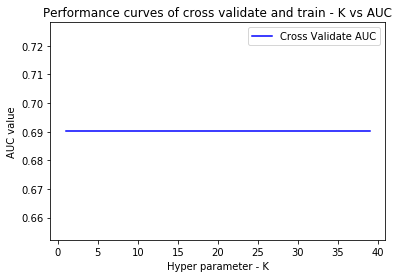

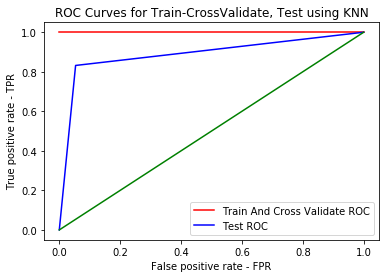

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    # Calculating auc values for 10-fold test k value
    scores = cross_val_score(knnClassifier, tfIdfTrainAndCrossValidateData, classesTrainAndCrossValidate, cv=2, scoring='roc_auc')
    areaUnderRocValuesCrossValidate.append(np.array(scores).mean());
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='brute');
# Transforming train and cross-validate data to bag of words representation
tfIdfTrainAndCrossValidate = tfIdfVectorizer.transform(reviewsTrainAndCrossValidate);
knnClassifier.fit(tfIdfTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(tfIdfTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
tfIdfTestData = tfIdfVectorizer.transform(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(tfIdfTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Tf-Idf vectorization and brute force(k-fold) algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(tfIdfTestData);
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Tf-Idf', 'Model': 'Brute(k-fold)', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Tf-Idf vectorization and brute force(k-fold) algorithm:
AUC values of cross-validate data: 
[0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873]
Optimal K-Value:  1
AUC value of test data:  0.8892171821661321
Accuracy score on test data:  0.8896080546565983
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1325,75
Actual: YES,232,1149


### Average Word2Vec & K-NN(brute and k-fold)

In [0]:
splittedReviewTexts = [];
for review in tqdm(reviewsTrainAndCrossValidate):
    splittedReviewTexts.append(review.split());
equalsBorder(70);
print("Shape of splitted reviews: ", len(splittedReviewTexts));
print("Sample elements: ", splittedReviewTexts[444:446]);
equalsBorder(70);

Shape of splitted reviews:  6489
Sample elements:  [['coming', 'back', 'living', 'england', 'several', 'months', 'craved', 'coriander', 'carrot', 'coriander', 'soup', 'coriander', 'spiced', 'omelettes', 'even', 'bay', 'area', 'spice', 'surprisingly', 'hard', 'find', 'especially', 'decent', 'price', 'buying', 'bulk', 'seller', 'price', 'unbeatable', 'quality', 'seems', 'comparable', 'name', 'brand', 'top', 'notch', 'stuff', 'england', 'one', 'thing', 'note', 'coriander', 'comes', 'metallic', 'pouches', 'not', 'resealable', 'want', 'keep', 'resealable', 'bag', 'container', 'provide', 'also', 'wish', 'found', 'someone', 'split', 'since', 'seems', 'like', 'even', 'bag', 'last', 'forever'], ['great', 'deal', 'especially', 'price', 'item', 'arrived', 'quicker', 'anticipated', 'saved', 'many', 'trips', 'dunkin', 'doniuts', 'well', 'saving', 'paying', 'double', 'price', 'cup', 'hot', 'chocolate', 'good', 'looking', 'stockpile']]


In [0]:
word2VecModel = Word2Vec(splittedReviewTexts, size = 30, min_count = 4);
vocabulary = word2VecModel.wv.vocab.keys();

In [0]:
word2VecModel.wv.most_similar("price")

[('cheaper', 0.9588451981544495),
 ('wayyyyyy', 0.9550163149833679),
 ('purchase', 0.9334691166877747),
 ('find', 0.9327251315116882),
 ('orginal', 0.9221214056015015),
 ('could', 0.9072782397270203),
 ('get', 0.9048711657524109),
 ('buying', 0.8971507549285889),
 ('buy', 0.8939188718795776),
 ('online', 0.8849596977233887)]

In [0]:
word2VecModel.wv['price']

array([ 1.6467367 ,  0.0756606 , -0.5644761 , -1.3187982 ,  0.24479704,
       -0.09404696,  0.03300094, -0.91116023,  0.6243002 , -0.62548906,
       -0.69230556, -0.29967925,  0.50675696, -1.9780341 ,  0.48205027,
       -0.5215949 , -0.6645221 ,  1.6072518 , -0.32343885,  1.3830184 ,
       -0.06915997,  0.71049535, -1.8067309 , -1.367866  , -0.03311484,
        1.2729372 ,  0.02216668,  0.2918636 ,  1.3837112 , -1.2941688 ],
      dtype=float32)

In [0]:
avgWord2VecRepresentation = [];
for splittedReview in tqdm(splittedReviewTexts):
    reviewsVector = np.zeros(30);
    noOfWordsPerReview = 0;
    for word in splittedReview:
        if word in vocabulary:
            reviewsVector += word2VecModel.wv[word];
            noOfWordsPerReview += 1;
    reviewsVector = reviewsVector / noOfWordsPerReview;
    avgWord2VecRepresentation.append(reviewsVector);
print("Average word2vec representation overview: ");
equalsBorder(70);
print("Shape of avg word2vector representation: ", len(avgWord2VecRepresentation));
print("Sample vector: ", avgWord2VecRepresentation[444]);

Average word2vec representation overview: 
Shape of avg word2vector representation:  6489
Sample vector:  [ 1.04202243 -0.15515758  0.24773499 -0.55418329  0.17877065 -0.50708362
  0.47088357 -0.23003313 -0.28897652 -0.48114553 -0.19398416 -0.40744953
 -0.08817213 -0.54973696  0.54938626 -0.3238625  -0.26038842  0.21401218
 -0.44336935  0.29186057  0.62708512  0.56054292 -0.43178001 -0.74614161
 -0.03269987  0.29644457 -0.05160114  0.35853477  0.83641731 -0.43567113]


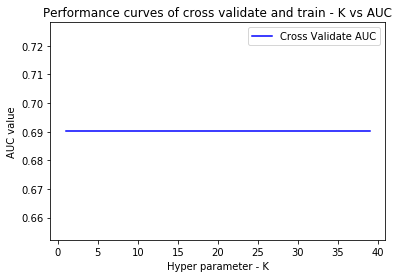

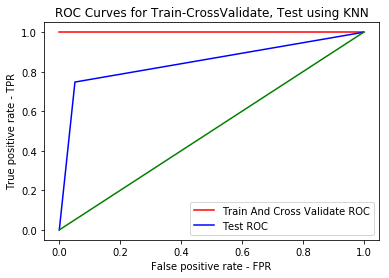

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    # Calculating auc values for 10-fold test k value
    scores = cross_val_score(knnClassifier, avgWord2VecRepresentation, classesTrainAndCrossValidate, cv=2, scoring='roc_auc')
    areaUnderRocValuesCrossValidate.append(np.array(scores).mean());
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='brute');
# Transforming train and cross-validate data to bag of words representation
avgWord2VecTrainAndCrossValidate = getAvgWord2VecRepresentation(reviewsTrainAndCrossValidate);
knnClassifier.fit(avgWord2VecTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(avgWord2VecTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
avgWord2VecTestData = getAvgWord2VecRepresentation(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(avgWord2VecTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Avg Word2Vector vectorization and brute force(k-fold) algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(avgWord2VecTestData);
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Avg Word2Vec', 'Model': 'Brute(k-fold)', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Avg Word2Vector vectorization and brute force(k-fold) algorithm:
AUC values of cross-validate data: 
[0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873]
Optimal K-Value:  1
AUC value of test data:  0.848290058963484
Accuracy score on test data:  0.8489751887810141
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1328,72
Actual: YES,348,1033


### Average Tf-Idf and K-NN(brute & k-fold)

In [0]:
idfDictionary = dict(zip(tfIdfVectorizer.get_feature_names(), tfIdfVectorizer.idf_));
print("Sample Idf Values: ");
equalsBorder(70);
print("Idf value of 'quick': ", idfDictionary['quick']);
print("Idf value of 'price': ", idfDictionary['price']);

Sample Idf Values: 
Idf value of 'quick':  4.982227264101395
Idf value of 'price':  3.2707400973131238


In [0]:
avgTfIdfRepresentation = [];
tfIdfFeatureNames = tfIdfVectorizer.get_feature_names();
for splittedReview in tqdm(splittedReviewTexts):
    sumTfIdfsOfWordsInReview = 0;
    tfIdfWord2VecProductReview = np.zeros(30);
    for word in splittedReview:
        if word in vocabulary and word in tfIdfFeatureNames:
            tfIdfWordValue = idfDictionary[word] * splittedReview.count(word) / len(word);
            tfIdfWord2VecProductReview += tfIdfWordValue * word2VecModel.wv[word];
            sumTfIdfsOfWordsInReview += tfIdfWordValue;
    avgTfIdfRepresentation.append(tfIdfWord2VecProductReview / sumTfIdfsOfWordsInReview);

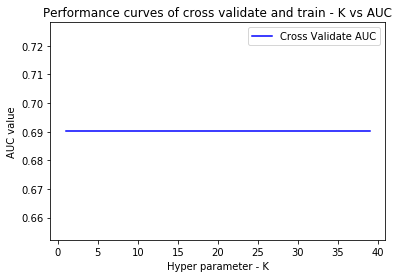

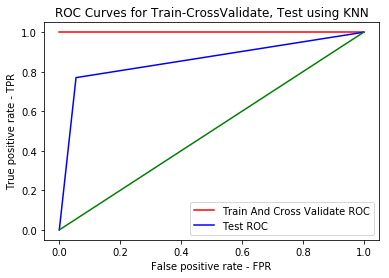

In [0]:
# For finding k-value using test values
testKValues = list(range(1, 40, 2));
areaUnderRocValuesCrossValidate = [];
for testKValue in tqdm(testKValues):
    # Initializing KNeighborsClassifier with algorithm brute
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    # Calculating auc values for 10-fold test k value
    scores = cross_val_score(knnClassifier, avgTfIdfRepresentation, classesTrainAndCrossValidate, cv=2, scoring='roc_auc')
    areaUnderRocValuesCrossValidate.append(np.array(scores).mean());
# plotting k-value vs auc curve
plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label='Cross Validate AUC');
plt.title("Performance curves of cross validate and train - K vs AUC");
plt.xlabel("Hyper parameter - K");
plt.ylabel("AUC value");
plt.legend();
plt.show();
# choosing k-value based on maximum auc value
optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
# Training data using knn with above optimal k-value
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm ='brute');
# Transforming train and cross-validate data to bag of words representation
avgTfIdfTrainAndCrossValidate = getAvgTfIdfRepresentation(reviewsTrainAndCrossValidate);
knnClassifier.fit(avgTfIdfTrainAndCrossValidate, classesTrainAndCrossValidate);
predProbScoresTrainAndCrossValidate = knnClassifier.predict_proba(avgTfIdfTrainAndCrossValidate);
fprTrainAndCrossValidate, tprTrainAndCrossValidate, thresholdTrainAndCrossValidate = roc_curve(classesTrainAndCrossValidate, predProbScoresTrainAndCrossValidate[:, 1]);
areaUnderRocValueTrainAndCrossValidate = auc(fprTrainAndCrossValidate, tprTrainAndCrossValidate);
# Transforming test dataset reviews into bag of words representation
avgTfIdfTestData = getAvgTfIdfRepresentation(reviewsTest);
# Probability scores of test dataset reviews using knn
predProbScoresTest = knnClassifier.predict_proba(avgTfIdfTestData);
# Generating fpr, tpr values for roc-curve of test dataset reviews
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
# auc value of roc curve generated above
areaUnderRocValueTest = auc(fprTest, tprTest);
# Plotting ROC curve of train-crossvalidate, test dataset reviews
plt.plot(fprTrainAndCrossValidate, tprTrainAndCrossValidate, 'r', label='Train And Cross Validate ROC');
plt.plot(fprTest, tprTest, 'b', label='Test ROC');
plt.title("ROC Curves for Train-CrossValidate, Test using KNN");
plt.plot([0, 1], [0, 1], 'g-');
plt.xlabel("False positive rate - FPR");
plt.ylabel("True positive rate - TPR");
plt.legend();
plt.show();

In [0]:
print("Results of reviews analysis using Avg Tf-Idf vectorization and brute force(k-fold) algorithm:");
equalsBorder(70);
print("AUC values of cross-validate data: ");
equalsBorder(40);
print(areaUnderRocValuesCrossValidate);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test dataset reviews
predictionClassesTest = knnClassifier.predict(avgTfIdfTestData);
# Accuracy score on test dataset reviews
accuracyScoreTest = accuracy_score(classesTest, predictionClassesTest);
equalsBorder(40);
print("Accuracy score on test data: ", accuracyScoreTest);
# Adding results to results dataframe
resultsDataFrame = resultsDataFrame.append({'Vectorizer': 'Avg Tf-Idf', 'Model': 'Brute(k-fold)', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest, 'Accuracy': accuracyScoreTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
equalsBorder(40);
print("Confusion Matrix: ");
confusionMatrixDataFrame

Results of reviews analysis using Avg Tf-Idf vectorization and brute force(k-fold) algorithm:
AUC values of cross-validate data: 
[0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873, 0.6902158065789873]
Optimal K-Value:  1
AUC value of test data:  0.857728095582911
Accuracy score on test data:  0.858324343761237
Confusion Matrix: 


,Predicted: NO,Predicted: YES
Actual: NO,1323,77
Actual: YES,317,1064


## Results of above analysis using different vectorization techinques and K-NN models

In [0]:
resultsDataFrame

,Vectorizer,Model,Hyper Parameter - K,AUC,Accuracy
0,Bag of words,Brute,3,0.853109,0.782452
1,Bag of words,kd-tree,3,0.855789,0.788206
2,Tf-Idf,Brute,1,0.882373,0.882776
3,Tf-Idf,kd-tree,1,0.882373,0.882776
4,Avg Word2Vec,Brute,1,0.862068,0.862639
5,Avg Word2Vec,kd-tree,1,0.862068,0.862639
6,Avg Tf-Idf,Brute,1,0.857410,0.857965
7,Avg Tf-Idf,kd-tree,1,0.857410,0.857965
8,Bag of words,brute(k-fold),3,0.851419,0.783172
9,Tf-Idf,Brute(k-fold),1,0.889217,0.889608


## Conclusion:
1. The above dataset is not seperable in the view of PCA and t-SNE. We cannot build model for the above problem using PCA, t-SNE.
2. It seems this problem is not seperable in 2-Dimesions, but it may be seperable in higher dimensions.
3. The best technique that we can use for classification of above reviews is combination of Tf-Idf and brute K-NN because it resulted in high AUC value and high accuracy(after balancing dataset).
4. Most of the techniques gave optimal hyper parameter-k as 3 or 1 due to which there is chance of overfitting.
5. For every k-nn strategies and vectorization techinques we can predict the classes of the reviews correctly with probability greater than 78%.

## 6. Classification & Modelling using Multinomial Naive Bayes classifier

In [27]:
bayesResultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Hyper Parameter - Alpha', 'AUC', 'Accuracy']);
bayesResultsDataFrame

,Vectorizer,Model,Hyper Parameter - Alpha,AUC,Accuracy


In [0]:
scoresDataInBinaryForm = list(map(lambda x: 1 if x == 'positive' else 0, scoresData));
print(len(scoresDataInBinaryForm));
scoresDataInBinaryForm[0:10]

88424


[1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

In [0]:
numberOfPoints = 35000;
reviewsTrain, reviewsTest, classesTest, classesTest = model_selection.train_test_split(preProcessedReviewsWithoutStopWords[0:numberOfPoints], scoresDataInBinaryForm[0:numberOfPoints], test_size = 0.3, random_state = 0, stratify = scoresDataInBinaryForm[0:numberOfPoints]);

In [0]:
countVectorizer = CountVectorizer(min_df = 4);
bowModel = countVectorizer.fit_transform(reviewsTrain);
print("Bag of words representation overview");
equalsBorder(70);
print("First 10 features(words): ");
print(countVectorizer.get_feature_names()[0:9]);
equalsBorder(70);
print("Last 10 features(words): ");
print(countVectorizer.get_feature_names()[-10:]);
equalsBorder(70);
print("Shape of bag of words(unigram) model: ", bowModel.shape);
print("Number of features: ", len(countVectorizer.get_feature_names()));
equalsBorder(70);
print("Array representation of bag of words: ");
bowTrainData = bowModel.toarray();
print(bowTrainData);

Bag of words representation overview
First 10 features(words): 
['aa', 'abandon', 'abandoned', 'abdominal', 'ability', 'abit', 'able', 'abroad', 'absence']
Last 10 features(words): 
['ziplock', 'zipper', 'zippy', 'ziwi', 'ziwipeak', 'zojirushi', 'zone', 'zucchini', 'zuke', 'zukes']
Shape of bag of words(unigram) model:  (24500, 10201)
Number of features:  10201
Array representation of bag of words: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
tfIdfVectorizer = TfidfVectorizer(min_df = 4);
tfIdfModel = tfIdfVectorizer.fit_transform(reviewsTrain);
print("TfIdf representation overview");
equalsBorder(70);
print("First 10 features(words): ");
print(tfIdfVectorizer.get_feature_names()[0:9]);
equalsBorder(70);
print("Last 10 features(words): ");
print(tfIdfVectorizer.get_feature_names()[-10:]);
equalsBorder(70);
print("Shape of TfIdf Model: ", tfIdfModel.shape);
print("Number of features: ", len(tfIdfVectorizer.get_feature_names()));
print("Array representation of TfIdf: ");
equalsBorder(70);
tfIdfTrainData = tfIdfModel.toarray();
tfIdfModelDenseForm = tfIdfModel.todense();
print(tfIdfTrainData);

TfIdf representation overview
First 10 features(words): 
['aa', 'abandon', 'abandoned', 'abdominal', 'ability', 'abit', 'able', 'abroad', 'absence']
Last 10 features(words): 
['ziplock', 'zipper', 'zippy', 'ziwi', 'ziwipeak', 'zojirushi', 'zone', 'zucchini', 'zuke', 'zukes']
Shape of TfIdf Model:  (24500, 10201)
Number of features:  10201
Array representation of TfIdf: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



Classification using naive bayes classifier of Bag of Words vectorized reviews


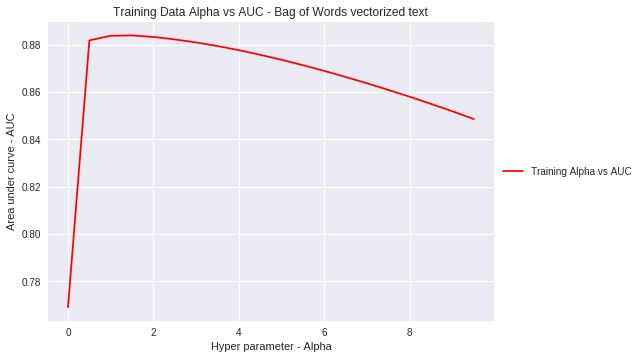

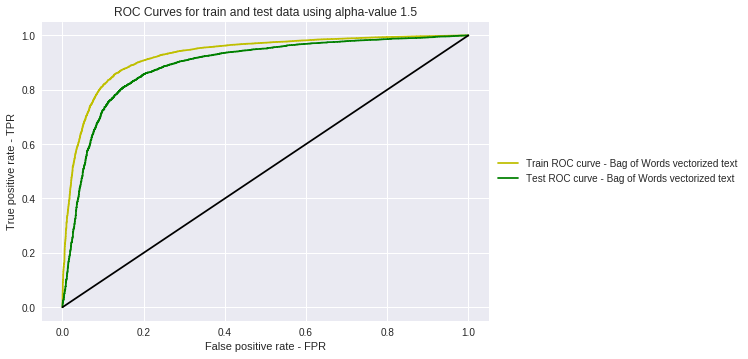

Results of analysis using Bag of Words vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.7689927461484796, 0.8817668388836204, 0.8837045208531926, 0.8838575323983651, 0.8832041067670552, 0.88216795210173, 0.8808793363249265, 0.879366536587073, 0.8776269235979359, 0.875664196725163, 0.8735595277597954, 0.8712744375721467, 0.8688590156203361, 0.866292203406756, 0.8636224881972566, 0.8608140672748525, 0.857934217739993, 0.8549206308200112, 0.851787516707337, 0.848516438940188]
Optimal K-Value:  1.5
AUC value of test data:  0.8900647756519087
Confusion Matrix : 


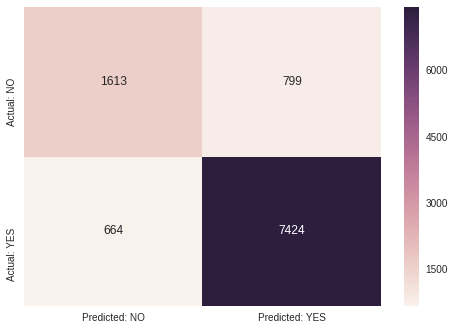


Classification using naive bayes classifier of Tf-Idf vectorized reviews


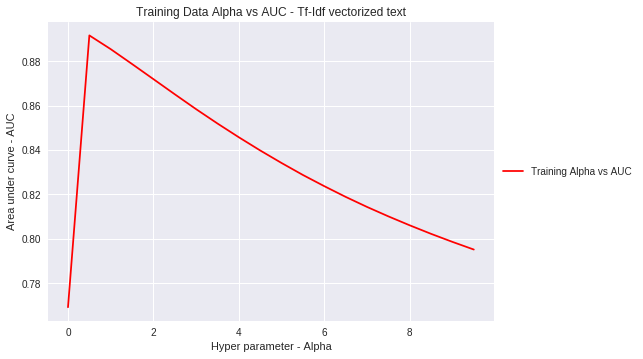

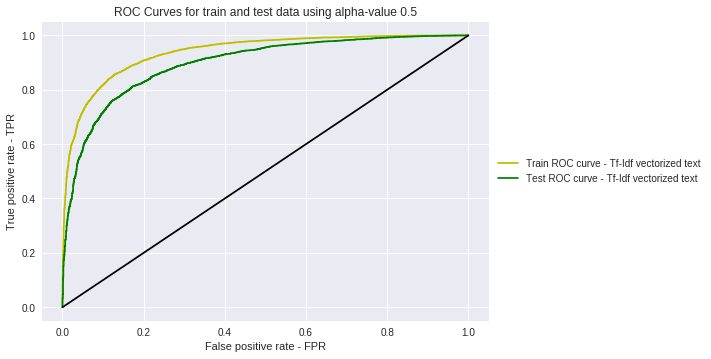

Results of analysis using Tf-Idf vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.7691472098095041, 0.8917297731094174, 0.8855364437676903, 0.8788228740464815, 0.8720109056858089, 0.8651775902444891, 0.8584547827996118, 0.8519899454808062, 0.8457863397095062, 0.8398368996723253, 0.8341826115334978, 0.8287785458428983, 0.8237345392592322, 0.8189071983891376, 0.814375004563264, 0.8101173520390546, 0.8060786339234507, 0.8022331515957191, 0.7986084672572977, 0.7951549022630658]
Optimal K-Value:  0.5
AUC value of test data:  0.8960554956834685
Confusion Matrix : 


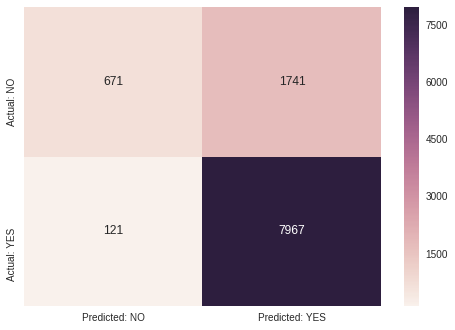

In [0]:
testAlphaValues = np.arange(0, 10, 0.5);
techniques = ['Bag of Words', 'Tf-Idf'];
for index, technique in enumerate(techniques):
    areaUnderRocValuesTrain = [];
    if(index == 0):
        trainingMergedData = bowTrainData
        testMergedData = countVectorizer.transform(reviewsTest);
    elif(index == 1):
        trainingMergedData = tfIdfTrainData
        testMergedData = tfIdfVectorizer.transform(reviewsTest);
    for testAlphaValue in tqdm(testAlphaValues):
        bayesClassifier = MultinomialNB(alpha = testAlphaValue);
        scores = model_selection.cross_val_score(bayesClassifier, trainingMergedData, classesTrain, cv = 10, scoring = 'roc_auc');
        areaUnderRocValuesTrain.append(np.array(scores).mean());
    equalsBorder(100);
    print("Classification using naive bayes classifier of {} vectorized reviews".format(technique));
    equalsBorder(100);
    plt.plot(testAlphaValues, areaUnderRocValuesTrain, 'r', label = "Training Alpha vs AUC");
    plt.title("Training Data Alpha vs AUC - {} vectorized text".format(technique));
    plt.xlabel("Hyper parameter - Alpha");
    plt.ylabel("Area under curve - AUC");
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    optimalAlphaValue = testAlphaValues[np.argmax(areaUnderRocValuesTrain)];
    bayesClassifier = MultinomialNB(alpha = optimalAlphaValue);
    bayesClassifier.fit(trainingMergedData, classesTrain);
    predProbScoresTraining = bayesClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTrain, predProbScoresTraining[:, 1]);
    predProbScoresTest = bayesClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
    areaUnderRocValueTest = auc(fprTest, tprTest);
    plt.plot(fprTrain, tprTrain, 'y', label="Train ROC curve - {} vectorized text".format(technique));
    plt.plot(fprTest, tprTest, 'g', label="Test ROC curve - {} vectorized text".format(technique));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.title("ROC Curves for train and test data using alpha-value {}".format(optimalAlphaValue))
    plt.xlabel('False positive rate - FPR');
    plt.ylabel('True positive rate - TPR');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    print("Results of analysis using {} vectorized text features merged with other features using K-NN brute force algorithm:".format(technique));
    equalsBorder(70);
    print("AUC values of train data: ");
    equalsBorder(40);
    print(areaUnderRocValuesTrain);
    equalsBorder(40);
    print("Optimal K-Value: ", optimalAlphaValue);
    equalsBorder(40);
    print("AUC value of test data: ", areaUnderRocValueTest);
    # Predicting classes of test data projects
    predictionClassesTest = bayesClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd');
    plt.show();
    # Adding results to results dataframe
    bayesResultsDataFrame = bayesResultsDataFrame.append({'Vectorizer': technique, 'Model': 'Brute', 'Hyper Parameter - K': optimalAlphaValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);

In [4]:
bayesResultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Hyper Parameter - Alpha', 'AUC']);
bayesResultsDataFrame

,Vectorizer,Model,Hyper Parameter - Alpha,AUC


In [6]:
bayesResultsDataFrame

,Vectorizer,Model,Hyper Parameter - Alpha,AUC
0,Bag of words,Multinomial bayes,1.5,0.890064
1,Tf-Idf,Multinomial bayes,0.5,0.896055


### Balancing Dataset

In [30]:
scoresDataInBinaryForm = list(map(lambda x: 1 if x == 'positive' else 0, scoresData));
print(len(scoresDataInBinaryForm));
scoresDataInBinaryForm[0:10]

88424


[1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

In [0]:
numberOfPoints = 20000;
reviewsTrain, reviewsTest, classesTrain, classesTest = model_selection.train_test_split(preProcessedReviewsWithoutStopWords[0:numberOfPoints], scoresDataInBinaryForm[0:numberOfPoints], test_size = 0.3, random_state = 0, stratify = scoresDataInBinaryForm[0:numberOfPoints]);

In [32]:
classesTrainArray = np.array(classesTrain);
print("Testing whether data is balanced: ");
equalsBorder(70);
numberOfPositiveReviews = len(classesTrainArray[classesTrainArray == 1]);
numberOfNegativeReviews = len(classesTrainArray[classesTrainArray == 0]);
print("Number of positive reviews: ", numberOfPositiveReviews);
print("Number of negative reviews: ", numberOfNegativeReviews);

Testing whether data is balanced: 
Number of positive reviews:  10804
Number of negative reviews:  3196


In [33]:
imbalancedDataFrame = pd.DataFrame({'review': reviewsTrain, 'polarity': classesTrain});
positiveData = imbalancedDataFrame[imbalancedDataFrame.polarity == 1];
negativeData = imbalancedDataFrame[imbalancedDataFrame.polarity == 0];
negativeDataBalanced = resample(negativeData, replace = True, n_samples = 10804, random_state = 44);
balancedData = pd.concat([positiveData, negativeDataBalanced]);
balancedData = shuffle(balancedData);
classesTrain = balancedData.polarity;
reviewsTrain = balancedData.review;
print("Testing whether data is balanced: ");
equalsBorder(70);
numberOfPositiveReviews = len(classesTrain[classesTrain == 1]);
numberOfNegativeReviews = len(classesTrain[classesTrain == 0]);
print("Number of positive reviews: ", numberOfPositiveReviews);
print("Number of negative reviews: ", numberOfNegativeReviews);

Testing whether data is balanced: 
Number of positive reviews:  10804
Number of negative reviews:  10804


In [34]:
countVectorizer = CountVectorizer(min_df = 4);
bowModel = countVectorizer.fit_transform(reviewsTrain);
print("Bag of words representation overview");
equalsBorder(70);
print("First 10 features(words): ");
print(countVectorizer.get_feature_names()[0:9]);
equalsBorder(70);
print("Last 10 features(words): ");
print(countVectorizer.get_feature_names()[-10:]);
equalsBorder(70);
print("Shape of bag of words(unigram) model: ", bowModel.shape);
print("Number of features: ", len(countVectorizer.get_feature_names()));
equalsBorder(70);
print("Array representation of bag of words: ");
bowTrainData = bowModel.toarray();
print(bowTrainData);

Bag of words representation overview
First 10 features(words): 
['aa', 'aback', 'abandoned', 'abandoning', 'abates', 'abberline', 'abdomen', 'abdominal', 'abilities']
Last 10 features(words): 
['zipper', 'zippy', 'ziwipeak', 'zoe', 'zojirushi', 'zola', 'zucchini', 'zuke', 'zukes', 'zupas']
Shape of bag of words(unigram) model:  (21608, 10642)
Number of features:  10642
Array representation of bag of words: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
tfIdfVectorizer = TfidfVectorizer(min_df = 4);
tfIdfModel = tfIdfVectorizer.fit_transform(reviewsTrain);
print("TfIdf representation overview");
equalsBorder(70);
print("First 10 features(words): ");
print(tfIdfVectorizer.get_feature_names()[0:9]);
equalsBorder(70);
print("Last 10 features(words): ");
print(tfIdfVectorizer.get_feature_names()[-10:]);
equalsBorder(70);
print("Shape of TfIdf Model: ", tfIdfModel.shape);
print("Number of features: ", len(tfIdfVectorizer.get_feature_names()));
print("Array representation of TfIdf: ");
equalsBorder(70);
tfIdfTrainData = tfIdfModel.toarray();
tfIdfModelDenseForm = tfIdfModel.todense();
print(tfIdfTrainData);

TfIdf representation overview
First 10 features(words): 
['aa', 'aback', 'abandoned', 'abandoning', 'abates', 'abberline', 'abdomen', 'abdominal', 'abilities']
Last 10 features(words): 
['zipper', 'zippy', 'ziwipeak', 'zoe', 'zojirushi', 'zola', 'zucchini', 'zuke', 'zukes', 'zupas']
Shape of TfIdf Model:  (21608, 10642)
Number of features:  10642
Array representation of TfIdf: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



Classification using naive bayes classifier of Bag of Words vectorized reviews


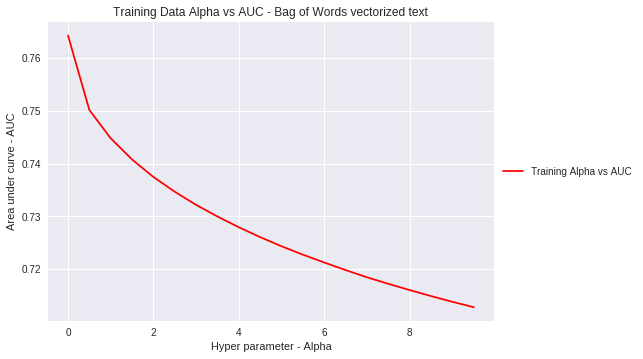

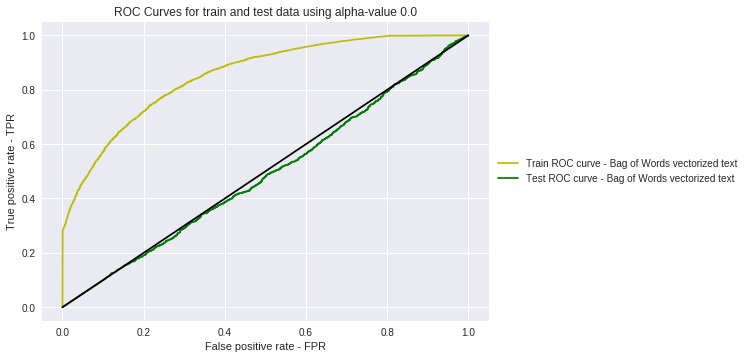

Results of analysis using Bag of Words vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.7642914157090708, 0.75016609187605, 0.7447854727188344, 0.7407694012420839, 0.7374589093883211, 0.7346618793395726, 0.7321626794229982, 0.7299623871783327, 0.727926201732504, 0.7260550752548125, 0.724323803529748, 0.7227320071561547, 0.7212434699899959, 0.7198125558026172, 0.7184390119704036, 0.7172054602711462, 0.7160218601915088, 0.7148847774612777, 0.7137956082386816, 0.7127754476169222]
Optimal K-Value:  0.0
AUC value of test data:  0.487848764799546
Confusion Matrix : 


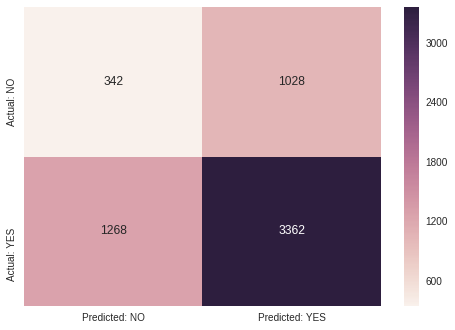


Classification using naive bayes classifier of Tf-Idf vectorized reviews


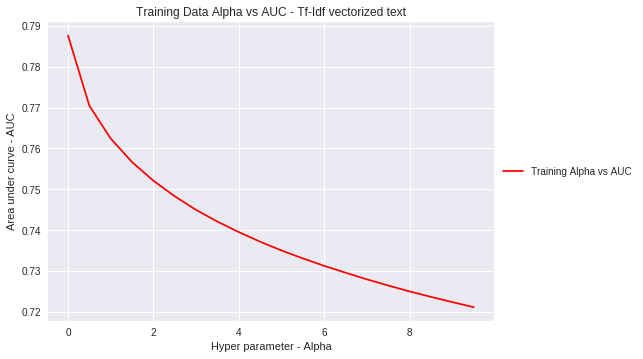

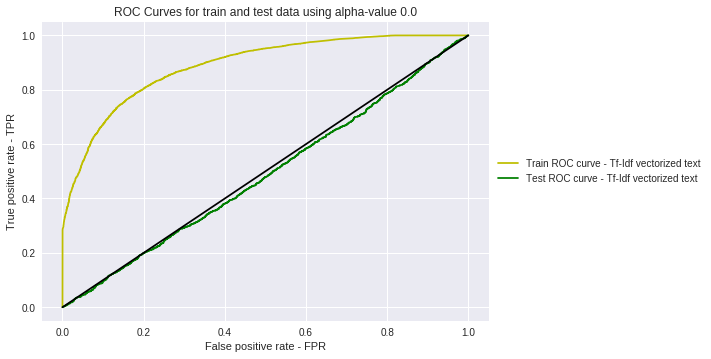

Results of analysis using Tf-Idf vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.7876761082592045, 0.7704721522265279, 0.7624228876262319, 0.7566690190573737, 0.7521085415122415, 0.7482950308586481, 0.7449580782311589, 0.742091264726475, 0.7395268695435695, 0.7371771001170382, 0.7350296326076278, 0.7330813345378743, 0.7312685934284119, 0.72958992025255, 0.7279637588218033, 0.7264506415376325, 0.7250034580084188, 0.723668433065735, 0.7223965405640345, 0.7211505376336064]
Optimal K-Value:  0.0
AUC value of test data:  0.48750224653560564
Confusion Matrix : 


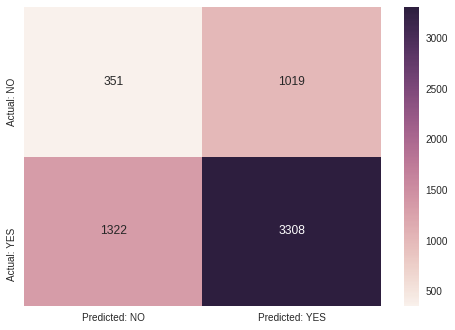

In [36]:
testAlphaValues = np.arange(0, 10, 0.5);
techniques = ['Bag of Words', 'Tf-Idf'];
for index, technique in enumerate(techniques):
    areaUnderRocValuesTrain = [];
    if(index == 0):
        trainingMergedData = bowTrainData
        testMergedData = countVectorizer.transform(reviewsTest);
    elif(index == 1):
        trainingMergedData = tfIdfTrainData
        testMergedData = tfIdfVectorizer.transform(reviewsTest);
    for testAlphaValue in tqdm(testAlphaValues):
        bayesClassifier = MultinomialNB(alpha = testAlphaValue);
        scores = model_selection.cross_val_score(bayesClassifier, trainingMergedData, classesTrain, cv = 10, scoring = 'roc_auc');
        areaUnderRocValuesTrain.append(np.array(scores).mean());
    equalsBorder(100);
    print("Classification using naive bayes classifier of {} vectorized reviews".format(technique));
    equalsBorder(100);
    plt.plot(testAlphaValues, areaUnderRocValuesTrain, 'r', label = "Training Alpha vs AUC");
    plt.title("Training Data Alpha vs AUC - {} vectorized text".format(technique));
    plt.xlabel("Hyper parameter - Alpha");
    plt.ylabel("Area under curve - AUC");
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    optimalAlphaValue = testAlphaValues[np.argmax(areaUnderRocValuesTrain)];
    bayesClassifier = MultinomialNB(alpha = optimalAlphaValue);
    bayesClassifier.fit(trainingMergedData, classesTrain);
    predProbScoresTraining = bayesClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTrain, predProbScoresTraining[:, 1]);
    predProbScoresTest = bayesClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
    areaUnderRocValueTest = auc(fprTest, tprTest);
    plt.plot(fprTrain, tprTrain, 'y', label="Train ROC curve - {} vectorized text".format(technique));
    plt.plot(fprTest, tprTest, 'g', label="Test ROC curve - {} vectorized text".format(technique));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.title("ROC Curves for train and test data using alpha-value {}".format(optimalAlphaValue))
    plt.xlabel('False positive rate - FPR');
    plt.ylabel('True positive rate - TPR');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    print("Results of analysis using {} vectorized text features merged with other features using K-NN brute force algorithm:".format(technique));
    equalsBorder(70);
    print("AUC values of train data: ");
    equalsBorder(40);
    print(areaUnderRocValuesTrain);
    equalsBorder(40);
    print("Optimal K-Value: ", optimalAlphaValue);
    equalsBorder(40);
    print("AUC value of test data: ", areaUnderRocValueTest);
    # Predicting classes of test data projects
    predictionClassesTest = bayesClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd');
    plt.show();
    # Adding results to results dataframe
    bayesResultsDataFrame = bayesResultsDataFrame.append({'Vectorizer': technique, 'Model': 'Brute', 'Hyper Parameter - Alpha': optimalAlphaValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);

In [8]:
bayesResultsDataFrame

,Vectorizer,Model,Hyper Parameter - Alpha,AUC
0,Bag of words,Multinomial bayes,1.5,0.890064
1,Tf-Idf,Multinomial bayes,0.5,0.896055
2,Bag of words(balanced data),Multinomial bayes,0.0,0.487848
3,Tf-Idf(balanced data),Multinomial bayes,0.0,0.487502
